# 📑Plan 

    I- Introduction
    
    II- Préparation du Jeu de Données (Choix des variables et Nettoyage du Dataset)
    
    III- Les Méthodes Employées
        A. Analyse Factorielle des Correspondances 
        B. Analyse en Composantes Principales
        C. ANOVA à un facteur
        D. Régression Linéaire Multiple
        E.Régression Logistique
        F.Analyse Factorielle Discriminante
        
    IV- Conclusion

# I- Introduction

L'API World Bank est un API qui fournit des données et des statistiques mondiales sur divers indicateurs économiques et sociaux. Ces indicateurs incluent notamment la population, le PIB (Produit Intérieur Brut), l'éducation, la santé, la pauvreté, et bien d'autres facteurs importants pour analyser le développement mondial.

Notre problématique : Quels sont les déterminants économiques et sociaux de la transition énergétique, et comment influencent-ils la mise en place d’énergies renouvelables dans les pays à revenus différents ?

# II- Préparation du Jeu de données

#### Importation des Bibliothèques

In [1]:
import requests
import pandas as pd
import numpy as np

#### Définition des Indicateurs

In [ ]:
# Définir les indicateurs 
indicators = {
    "EG.FEC.RNEW.ZS": "Taux d'énergie renouvelable",
    "EG.ELC.RNWX.ZS": "Investissements en énergies renouvelables (% du PIB)",
    "NY.GDP.PCAP.CD": "PIB par habitant (USD)",
    "SE.SEC.NENR": "Taux de scolarisation secondaire (%)",
    "EG.ELC.ACCS.ZS": "Accès à l'électricité (%)"
}


# Définir la période de 2010 à 2023
start_year = 2010
end_year = 2023


#### Ce code récupère les données des indicateurs  via l'API de la **Banque mondiale** pour la période **2010-2023**. Il combine ces données dans un **DataFrame unique** en effectuant les étapes suivantes :

1. Envoi d'une requête pour chaque indicateur.  
2. Normalisation des données JSON en un tableau structuré.  
3. Sélection et renommage des colonnes essentielles (Pays, Année, Valeur).  
4. Fusion progressive des données sur les colonnes "Country" et "Year".  


In [ ]:
# DataFrame vide pour combiner les données
df_combined = pd.DataFrame()

# Boucle pour récupérer chaque indicateur et ajouter les données dans le dataframe
for indicator, description in indicators.items():
    
    url = f"http://api.worldbank.org/v2/country/all/indicator/{indicator}?format=json&date={start_year}:{end_year}&per_page=5000"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        if data and len(data) > 1:
            results = data[1]
            
            # Normaliser la réponse JSON pour en faire un DataFrame
            df = pd.json_normalize(results)
            
            # Garder uniquement les colonnes nécessaires : pays, valeur de l'indicateur et année
            df = df[["country.value", "value", "date"]]
            
            # Renommer les colonnes
            df.columns = ["Country", description, "Year"]
            
            # Si df_combined est vide, initialisez-le avec le premier indicateur
            if df_combined.empty:
                df_combined = df
            else:
                # Fusionner sur les colonnes "Country" et "Year"
                df_combined = pd.merge(df_combined, df, on=["Country", "Year"], how="outer")
        else:
            print(f"Aucune donnée trouvée pour l'indicateur {indicator}.")
    else:
        print(f"Erreur lors de la requête pour l'indicateur {indicator} : {response.status_code}")

#### Vérification de la structure des données récupérées

In [4]:
# Vérification de la structure des données récupérées
print(df_combined.head())

       Country  Taux d'énergie renouvelable  Year  \
0  Afghanistan                         15.2  2010   
1  Afghanistan                         12.6  2011   
2  Afghanistan                         15.4  2012   
3  Afghanistan                         16.9  2013   
4  Afghanistan                         19.1  2014   

   Investissements en énergies renouvelables (% du PIB)  \
0                                                NaN      
1                                                NaN      
2                                                NaN      
3                                                NaN      
4                                                NaN      

   PIB par habitant (USD)  Taux de scolarisation secondaire (%)  \
0              560.621505                                   NaN   
1              606.694676                                   NaN   
2              651.417134                                   NaN   
3              637.087099                               46

#### Vérifier les colonnes extraites

In [5]:
# Vérifier les colonnes extraites
print("\nListe des colonnes disponibles :")
print(df_combined.columns)


Liste des colonnes disponibles :
Index(['Country', 'Taux d'énergie renouvelable', 'Year',
       'Investissements en énergies renouvelables (% du PIB)',
       'PIB par habitant (USD)', 'Taux de scolarisation secondaire (%)',
       'Accès à l'électricité (%)'],
      dtype='object')


#### Identification et Quantification des Valeurs Manquantes par Colonne

In [6]:
# Vérifier les colonnes avec des valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(df_combined.isnull().sum())

# Pourcentage de valeurs manquantes par colonne
print("\nPourcentage de valeurs manquantes par colonne :")
missing_percent = (df_combined.isnull().sum() / len(df_combined)) * 100
print(missing_percent)


Valeurs manquantes par colonne :
Country                                                    0
Taux d'énergie renouvelable                              585
Year                                                       0
Investissements en énergies renouvelables (% du PIB)    2610
PIB par habitant (USD)                                   114
Taux de scolarisation secondaire (%)                    2363
Accès à l'électricité (%)                                305
dtype: int64

Pourcentage de valeurs manquantes par colonne :
Country                                                  0.000000
Taux d'énergie renouvelable                             15.708915
Year                                                     0.000000
Investissements en énergies renouvelables (% du PIB)    70.085929
PIB par habitant (USD)                                   3.061224
Taux de scolarisation secondaire (%)                    63.453276
Accès à l'électricité (%)                                8.190118
dtype: float64


In [7]:
# Renommer les colonnes pour utiliser des noms en français
df_combined.rename(columns={"Country": "Pays", "Year": "Année"}, inplace=True)

# Vérification après renommage
print("Colonnes après renommage :", df_combined.columns)

Colonnes après renommage : Index(['Pays', 'Taux d'énergie renouvelable', 'Année',
       'Investissements en énergies renouvelables (% du PIB)',
       'PIB par habitant (USD)', 'Taux de scolarisation secondaire (%)',
       'Accès à l'électricité (%)'],
      dtype='object')


In [8]:
print(df_combined.dtypes)

Pays                                                     object
Taux d'énergie renouvelable                             float64
Année                                                    object
Investissements en énergies renouvelables (% du PIB)    float64
PIB par habitant (USD)                                  float64
Taux de scolarisation secondaire (%)                    float64
Accès à l'électricité (%)                               float64
dtype: object


#### Gestion des Valeurs Manquantes pour les Colonnes Numériques

In [9]:
# Identifier les colonnes numériques
colonnes_numeriques = df_combined.select_dtypes(include=['float64', 'int64']).columns

# Remplir par la moyenne par pays pour chaque indicateur
for col in colonnes_numeriques:
    df_combined[col] = df_combined.groupby("Pays")[col].transform(lambda x: x.fillna(x.mean()))

# Remplir les valeurs restantes par la moyenne globale
for col in colonnes_numeriques:
    df_combined[col] = df_combined[col].fillna(df_combined[col].mean())


1-**Remplir les valeurs manquantes par la moyenne, par pays :**

Pour chaque colonne numérique (col), groupby("Pays") crée un groupe de données par pays.
**transform(lambda x: x.fillna(x.mean()))** remplit les valeurs manquantes dans chaque groupe par la moyenne de ce groupe. Cela permet de compenser les valeurs manquantes de manière locale, selon les données disponibles pour chaque pays.

2-**Remplir les valeurs restantes par la moyenne globale :**

Ensuite, pour les valeurs manquantes restantes après le remplissage par groupe, on remplit encore une fois par la moyenne globale de la colonne.
**fillna(df_combined[col].mean())** remplace les valeurs manquantes par la moyenne calculée sur toute la colonne, assurant ainsi une imputation uniforme pour les données globales.


#### Vérification des valeurs manquantes après traitement

In [10]:
# Vérification des valeurs manquantes après traitement
print("\nValeurs manquantes par colonne après traitement :")
print(df_combined.isnull().sum())

# Pourcentage de valeurs manquantes après traitement
print("\nPourcentage de valeurs manquantes par colonne :")
missing_percent = (df_combined.isnull().sum() / len(df_combined)) * 100
print(missing_percent)


Valeurs manquantes par colonne après traitement :
Pays                                                    0
Taux d'énergie renouvelable                             0
Année                                                   0
Investissements en énergies renouvelables (% du PIB)    0
PIB par habitant (USD)                                  0
Taux de scolarisation secondaire (%)                    0
Accès à l'électricité (%)                               0
dtype: int64

Pourcentage de valeurs manquantes par colonne :
Pays                                                    0.0
Taux d'énergie renouvelable                             0.0
Année                                                   0.0
Investissements en énergies renouvelables (% du PIB)    0.0
PIB par habitant (USD)                                  0.0
Taux de scolarisation secondaire (%)                    0.0
Accès à l'électricité (%)                               0.0
dtype: float64


#### Vérifier s'il y a des doublons

In [11]:
# Vérifier s'il y a des doublons
duplicates = df_combined[df_combined.duplicated()]
print(f"\nNombre de doublons trouvés : {len(duplicates)}")


Nombre de doublons trouvés : 0


In [12]:
# Vérifiez un aperçu des données
print(df_combined.head())

          Pays  Taux d'énergie renouvelable Année  \
0  Afghanistan                         15.2  2010   
1  Afghanistan                         12.6  2011   
2  Afghanistan                         15.4  2012   
3  Afghanistan                         16.9  2013   
4  Afghanistan                         19.1  2014   

   Investissements en énergies renouvelables (% du PIB)  \
0                                           4.838663      
1                                           4.838663      
2                                           4.838663      
3                                           4.838663      
4                                           4.838663      

   PIB par habitant (USD)  Taux de scolarisation secondaire (%)  \
0              560.621505                             47.154018   
1              606.694676                             47.154018   
2              651.417134                             47.154018   
3              637.087099                             46.1

#### Ajouter des colonnes calculer :

In [13]:
# Ajouter la classification par revenu basée sur le PIB par habitant
def classify_income(row):
    if row['PIB par habitant (USD)'] < 1046:
        return 'Low income'
    elif 1046 <= row['PIB par habitant (USD)'] < 4136:
        return 'Lower middle income'
    elif 4136 <= row['PIB par habitant (USD)'] < 12846:
        return 'Upper middle income'
    else:
        return 'High income'

df_combined['Revenu'] = df_combined.apply(classify_income, axis=1)


# Ajouter une colonne binaire pour déterminer si un pays dépasse 50% d'énergie renouvelable
df_combined['Dépassement 50%'] = df_combined['Taux d\'énergie renouvelable'].apply(lambda x: 'Oui' if x > 50 else 'Non')

# Ajouter la classification de la transition énergétique
def classify_transition(row):
    if row['Taux d\'énergie renouvelable'] > 50:
        return 'Avancée'
    elif 25 <= row['Taux d\'énergie renouvelable'] <= 50:
        return 'Intermédiaire'
    else:
        return 'Débutante'

df_combined['Classification Transition Énergétique'] = df_combined.apply(classify_transition, axis=1)

#### Exporter les données dans un fichier CSV

In [14]:
# Filtrer les données pour ne garder que l'année 2023
df_combined_2023 = df_combined[df_combined['Année'] == '2023']

# Enregistrer les données nettoyées et transformées dans un fichier CSV
df_combined_2023.to_csv('transition_energetique_pays_2023.csv', index=False)

print("Données pour l'année 2023 enregistrées dans 'transition_energetique_pays_2023.csv'")

Données pour l'année 2023 enregistrées dans 'transition_energetique_pays_2023.csv'


# III- Méthodes Employées

# A. Analyse Factorielle des Correspondances (AFC)

## Objectif :

 Étudier les relations entre la classification de la transition énergétique (Avancée, débutante, intermédiaire) et les classifications des pays (revenu faible, intermédiaire, élevé).

## Questions que l'on se pose  :

1. Existe-t-il une association entre les catégories de revenus des pays et leur dépendance aux énergies renouvelables ?

2. Les pays avec des politiques énergétiques avancées sont-ils principalement issus de certaines catégories de revenus ?

## Données nécessaires :

    Classification des pays par revenu : Low income, Lower middle income, Upper middle income, High income.
	Classification Transition Énergétique: Avancée, Débutante, Intermédiaire.

### Données d'entrée et Construction du tableau de contingence

In [2]:
import pandas as pd
from fanalysis.ca import CA
import numpy as np
import matplotlib.pyplot as plt

# Chargement des données depuis le fichier CSV 
data = pd.read_csv('transition_energetique_pays_2023.csv') 
# Création du tableau de contingence 
contingency_table = pd.crosstab(data['Revenu'], data['Classification Transition Énergétique'])

display(contingency_table)


Classification Transition Énergétique,Avancée,Débutante,Intermédiaire
Revenu,,,
High income,5,83,18
Low income,20,2,1
Lower middle income,35,11,20
Upper middle income,3,49,19


### Modèle d'indépendance et Calcul des écarts

Calcul du modèle d'indépendance, en déterminant les écarts entre les valeurs observées et les valeurs attendues (Matrices T0 et R)

In [3]:
# Calcul du modèle d'indépendance
total = contingency_table.values.sum()
row_totals = contingency_table.sum(axis=1).values
col_totals = contingency_table.sum(axis=0).values
expected = np.outer(row_totals, col_totals) / total

# Calcul des écarts
residuals = contingency_table.values - expected
print("Modèle d'indépendance attendu :")
print(expected)
print ('-------------------------')
print("Écarts à l'indépendance :")
residuals


Modèle d'indépendance attendu :
[[25.10526316 57.78195489 23.11278195]
 [ 5.44736842 12.53759398  5.01503759]
 [15.63157895 35.97744361 14.39097744]
 [16.81578947 38.70300752 15.48120301]]
-------------------------
Écarts à l'indépendance :


array([[-20.10526316,  25.21804511,  -5.11278195],
       [ 14.55263158, -10.53759398,  -4.01503759],
       [ 19.36842105, -24.97744361,   5.60902256],
       [-13.81578947,  10.29699248,   3.51879699]])

### Décomposition en facteurs principaux

Application de la décomposition en valeurs singulières (SVD) pour obtenir les axes principaux de l'AFC.

In [4]:
from sklearn.decomposition import TruncatedSVD

# Application de SVD pour obtenir les axes principaux
svd = TruncatedSVD(n_components=2)
transformed_data = svd.fit_transform(residuals)

transformed_data

array([[ 32.51732626,  -2.98922032],
       [-17.15332397,  -6.68610324],
       [-31.89116533,   3.66375913],
       [ 16.52716304,   6.01156444]])

### Interprétation des résultats

Visualisation des axes principaux obtenus à partir des valeurs propres et des vecteurs propres.

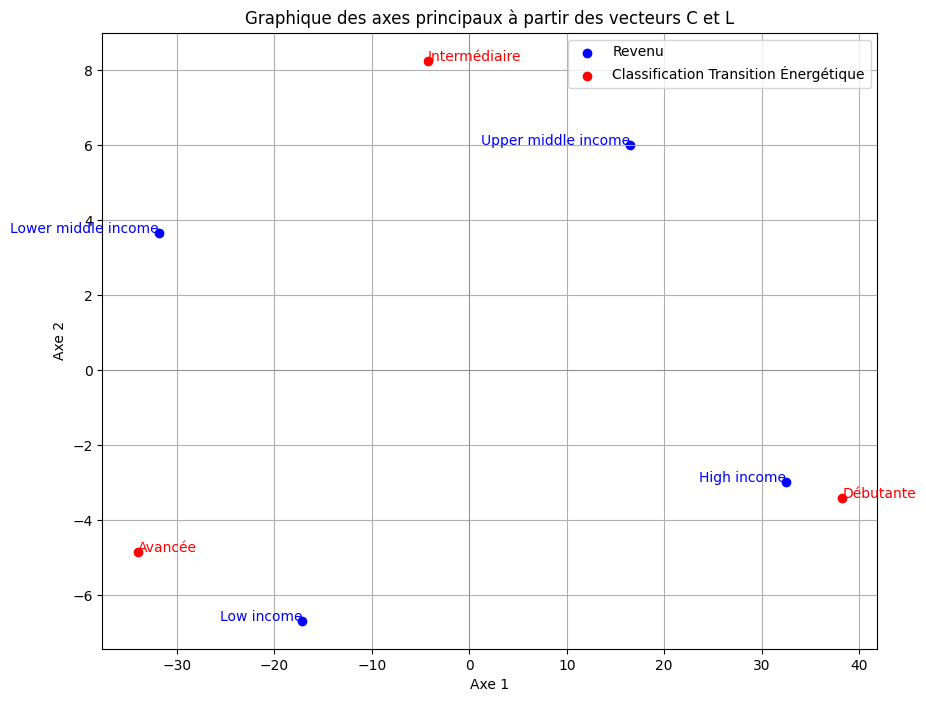

In [5]:
L = svd.fit_transform(residuals) # Coordonnées des lignes (types de revenu)
C = svd.components_.T * svd.singular_values_ # Coordonnées des colonnes (classification transition énergétique) 

# Noms des modalités pour chaque catégorie
revenu_labels = list(contingency_table.index)
transition_labels = list(contingency_table.columns) 

# Tracé du graphique 
plt.figure(figsize=(10, 8)) 

# Affichage des points pour les types de revenu (L) 
plt.scatter(L[:, 0], L[:, 1], color='blue', label='Revenu') 
for i, label in enumerate(revenu_labels): 
    plt.annotate(label, (L[i, 0], L[i, 1]), color='blue', ha='right') 

    # Affichage des points pour les classifications de transition énergétique (C) 
plt.scatter(C[:, 0], C[:, 1], color='red', label='Classification Transition Énergétique')
for i, label in enumerate(transition_labels): 
    plt.annotate(label, (C[i, 0], C[i, 1]), color='red', ha='left') 

# Ajustements du graphique 
plt.title("Graphique des axes principaux à partir des vecteurs C et L")
plt.xlabel("Axe 1") 
plt.ylabel("Axe 2")
plt.axhline(0, color='gray', lw=0.5) 
plt.axvline(0, color='gray', lw=0.5)
plt.grid(True)
plt.legend()
plt.show()

### Interprétation :

Les produits scalaires entre les coordonnées des modalités révèlent les associations fortes, faibles ou neutres entre les différents niveaux de revenu et les classifications de transition énergétique.

        + Association Positive (Produit Scalaire Positif) : 
    "High Income" & "Débutante" : Une association positive indique qu'il existe une tendance pour certains pays à haut revenu à être dans une phase débutante de la transition énergétique, malgré leurs ressources.

    "Upper Middle Income" & "Intermédiaire" : Ces pays montrent une transition énergétique en cours.

    "Lower Middle Income" & "Avancée" et "Lower Middle Income" & "Intermédiare" :  Ces pays montrent une transition énergétique soit en cours soit avancée.

    "Low Income" & "Avancée" : Les pays à faible revenu sont plus avancés dans la transition énergétique en général.

        + Association Négative (Produit Scalaire Négatif) :
     "Low Income" & "Intermédiare" : Une association négative suggère que les pays à faible revenu sont moins représentés dans la catégorie de transition énergétique intermédiaire.

    "Lower Middle Income" & "Débutante" : Indique que les pays à revenu intermédiaire inférieur sont moins susceptibles d'être en phase débutante de la transition énergétique.
    
    "High Income" & "Avancée" et "High Income" & "Intermédiare" :Les pays à haut revenu montrent une petite susceptibilité d'être classifiés en tant qu' avancés ou intermédiaires dans la transition énergétique.

        + Association Neutre (Produit Scalaire Nul) :
    "Low Income" & "Débutante" : on retrouve une relation neutre entre les pays à revenu faible et une phase débutante de la transition énergitique malgré le manque de ressources.
    
    "Upper Middle Income" et "Débutante" : on observe une relation neutre entre ces pays et une phase débutante de la transition énergitique .

## Axes Factoriels, Profils Lignes/Colonnes et Qualité de Représentation (Cos2)

On re visualise le tableau de contingence

In [6]:
display(contingency_table)

Classification Transition Énergétique,Avancée,Débutante,Intermédiaire
Revenu,,,
High income,5,83,18
Low income,20,2,1
Lower middle income,35,11,20
Upper middle income,3,49,19


In [7]:
# On crée une instance de la classe CA (Analyse des Correspondances)
afc = CA(
    row_labels=contingency_table.index.values,  
    col_labels=contingency_table.columns.values, 
    stats=True  
)

# Ajuster le modèle AFC en utilisant les valeurs du DataFrame
afc.fit(contingency_table.values)

CA(col_labels=array(['Avancée', 'Débutante', 'Intermédiaire'], dtype=object),
   row_labels=array(['High income', 'Low income', 'Lower middle income',
       'Upper middle income'], dtype=object))

### Aides à l'interprétation
#### Choix des axes factorielles

In [8]:
# Accéder aux valeurs propres (Eigenvalues) du modèle d'Analyse des Correspondances (AFC)
print(afc.eig_)

[[4.82072081e-01 3.52295735e-02]
 [9.31897427e+01 6.81025727e+00]
 [9.31897427e+01 1.00000000e+02]]


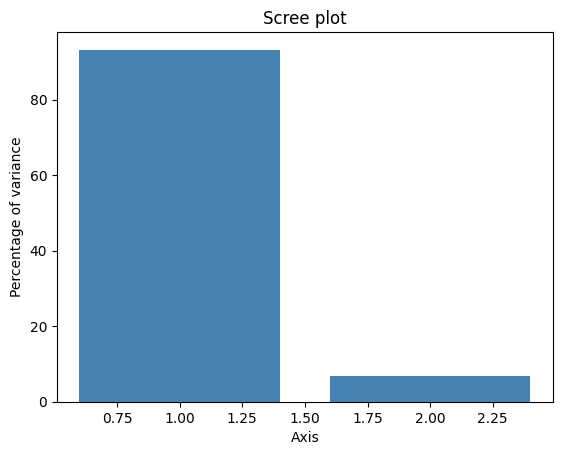

In [9]:
# Visualiser les valeurs propres sous forme de pourcentage de variance expliquée par chaque dimension
afc.plot_eigenvalues(type="percentage")

#### Interptétation
Le premier axe (Axis 1) explique environ 90% de la variance totale des données. Cela signifie que ce premier axe capture une grande partie des relations importantes entre les pays et leur classification de transition énergétique.

Le deuxième axe (Axis 2) explique environ 8% de la variance. Il ajoute des informations supplémentaires mais de manière moins significative que le premier axe.

Ensemble, les deux premières dimensions expliquent environ 98% de la variance totale, ce qui signifie que presque toutes les relations importantes et les variations dans les données sont capturées par ces deux axes.

#### Analyse des qualités de représentation (cos2)

##### 1. Analyse suivant le profil ligne (Revenu)

Premier axe factoriel


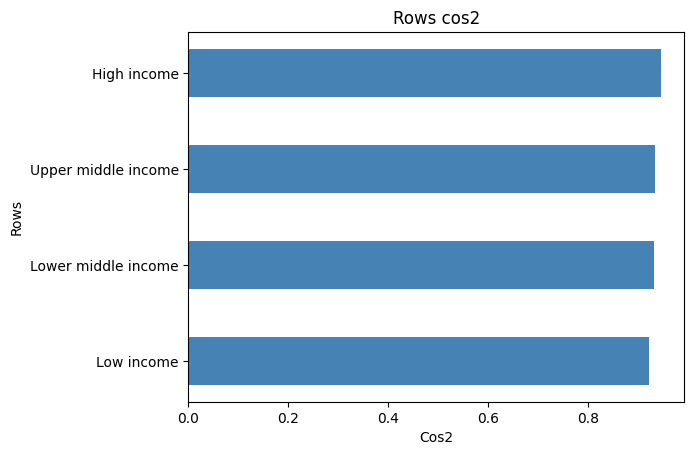

In [10]:
# Afficher la qualité de représentation des lignes (Revenu) pour le premier axe factoriel
print("Premier axe factoriel")
afc.plot_row_cos2(num_axis=1)

##### Interprétation :
Les valeurs élevées de Cos2 pour toutes les catégories de revenu montrent que le premier axe factoriel capture efficacement les principales relations et variations dans les données de transition énergétique. Cela signifie que les caractéristiques liées à la transition énergétique des pays, qu'ils soient à revenu élevé, intermédiaire supérieur, intermédiaire inférieur ou faible, sont bien expliquées par le premier axe. En d'autres termes, il existe une forte association entre les catégories de revenus des pays et leurs profils de transition énergétique.

Second axe factoriel


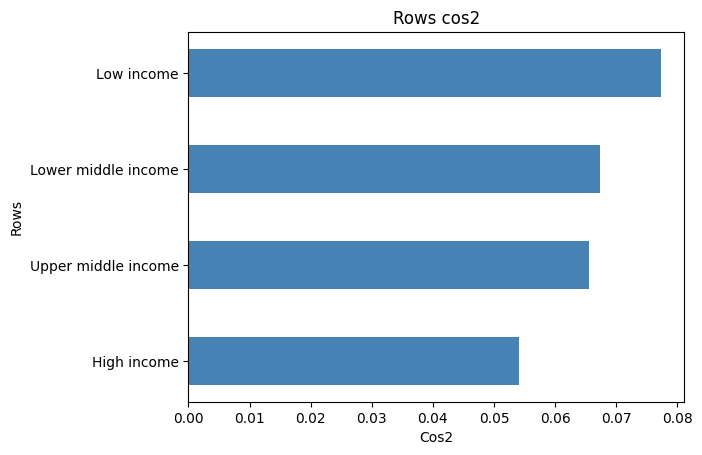

In [11]:
# Afficher la qualité de représentation des lignes (Revenu) pour le Second axe factoriel
print("Second axe factoriel")
afc.plot_row_cos2(num_axis=2)

#### Interptétation
    Les valeurs de Cos2 pour le second axe sont très faibles (0.075, 0.067, 0.065 et 0.055), donc les caractéristiques liées aux revenus sont mal expliquées mais elles apportent des nuances supplémentaires et complètent l'analyse du premier axe. Parmi ces faibles valeurs, les pays à revenu faible sont les mieux représentés, tandis que les pays à revenu élevé sont les moins bien représentés par le second axe.

##### 2. Analyse suivant le profil colonne (Classification Transition Énergétique)

Premier axe factoriel


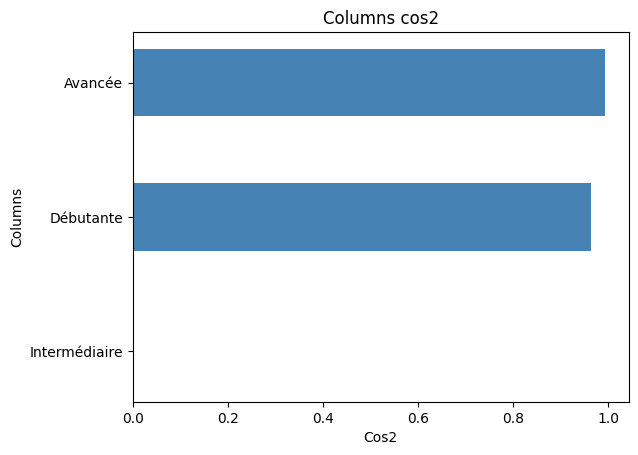

In [13]:
# Afficher la qualité de représentation des colonnes (Classification Transition Energétique) pour le premier axe factoriel
print("Premier axe factoriel")
afc.plot_col_cos2(num_axis=1)

#### Interptétation
    + Avancée :
Cos2 proche de 1 : Cette valeur indique une qualité de représentation quasi parfaite par le premier axe. Cela signifie que cette classification est très bien expliquée par ce premier axe.
    
    Interprétation : Les pays ayant des politiques énergétiques avancées sont fortement associés aux caractéristiques principales capturées par le premier axe, ce qui suggère qu'ils suivent des tendances similaires en termes de transition énergétique.

    + Débutante :
Cos2 proche de 1 : Cette valeur montre également une qualité de représentation très élevée par le premier axe.

    Interprétation : Les pays avec des politiques énergétiques débutantes montrent des caractéristiques similaires bien capturées par le premier axe, indiquant que ce premier axe représente efficacement leurs profils de transition énergétique.

    + Intermédiaire :
Cos2 proche de 0, non visible : Cela signifie que cette classification de transition énergétique est mal représentée par le premier axe.
    
    Interprétation : Les pays ayant des politiques énergétiques intermédiaires ne suivent pas les mêmes tendances principales capturées par le premier axe. Leurs variations ne sont pas bien expliquées par cette dimension, suggérant que d'autres axes sont nécessaires pour mieux comprendre leurs profils de transition énergétique.

Second axe factoriel


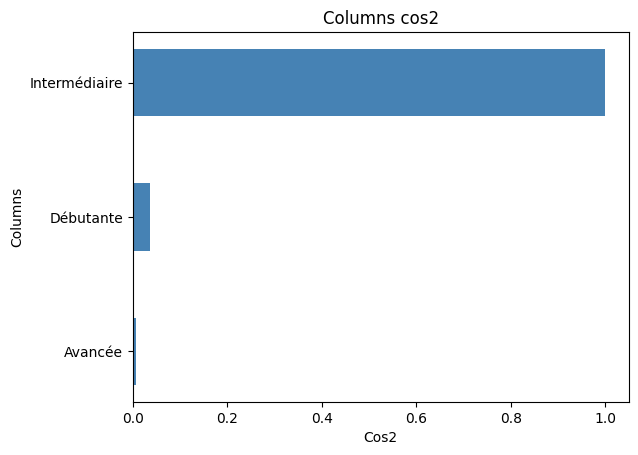

In [14]:
# Afficher la qualité de représentation des colonnes (Classification Transition Energétique) pour le Second axe factoriel
print("Second axe factoriel")
afc.plot_col_cos2(num_axis=2)

#### Interprétation
    + Intermédiaire :
    Cos2 de 0,98 : Cette valeur est très élevée contrairement à celle du premier axe, ce qui signifie que cette classification de transition énergétique est extrêmement bien représentée par le second axe.
     Cette valeur indique que des aspects importants de leur transition énergétique ne sont pas totalement expliqués par le premier axe et nécessitent le second axe pour être pleinement compris.

    + Débutante :
    Cos2 de 0,05 : Bien que cette valeur soit la deuxième plus élevée parmi les classifications de transition énergétique, elle est très faible et donc est faiblement représentées par le second axe.
    
    + Avancée :
    Cos2 de 0,01 : Cette valeur est la plus faible parmi toutes les classifications de transition énergétique, pratiquement égale à 0.
     Les pays ayant des politiques énergétiques avancées ne présentent pas des variations significatives capturées par le second axe, ce qui suggère que les principaux facteurs de leur transition énergétique sont déjà bien expliqués par le premier axe.

#### Analyse des contributions

##### Profils lignes (Revenu) 

Premier axe


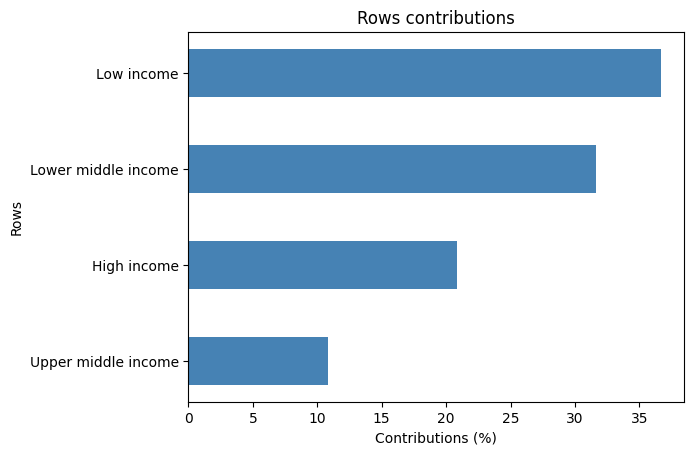

In [15]:
# Afficher la contribution des profils lignes au premier axe factoriel
print("Premier axe")  
afc.plot_row_contrib(num_axis=1)  

#### Interprétation
    Revenu Faible (Low income) : Contribution d'environ 37%. Cela signifie qu'il a été déterminant pour caractériser cet axe.

    Revenu Intermédiaire Inférieur (Lower middle income) : Contribution d'environ 33%. Cela signifie qu'il a également joué un rôle important dans la construction de cet axe.

    Revenu Élevé (High income) : Contribution d'environ 22%. Cela signifie qu'il a eu une influence modérée sur cet axe.

    Revenu Intermédiaire Supérieur (Upper middle income) : Contribution d'environ 11%. Cela signifie qu'il a joué un rôle mineur dans la construction de cet axe factoriel.

Second axe


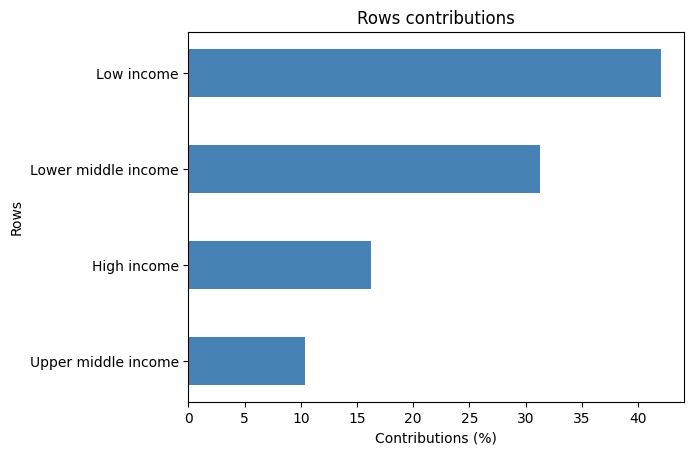

In [16]:
# Afficher la contribution des profils lignes au deuxième axe factoriel
print("Second axe")  
afc.plot_row_contrib(num_axis=2)  

#### Interprétation : 
    Revenu Faible (Low income) : Contribution la plus élevée : 42% . Cela signifie que cette catégorie a été déterminante pour caractériser cet axe.

    Revenu Intermédiaire Inférieur (Lower middle income) : Contribution significative (33%) mais inférieure à celle des revenus faibles. Elle a aussi joué un rôle important pour caractériser cet axe.

    Revenu Élevé (High income) : Contribution significativement plus faible que les revenus intermédiaires inférieurs (17 %) et donc a joué un rôle moins important.

    Revenu Intermédiaire Supérieur (Upper middle income) : Contribution la plus faible (11 %). Cela signifie que cette catégorie a joué un rôle mineur dans la construction de cet axe factoriel.

Profils colonnes (Classification Transition Énergétique) 

Premier axe


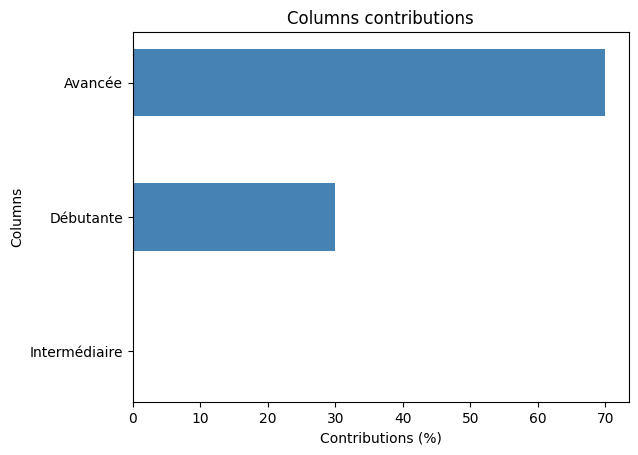

In [17]:
# Afficher la contribution des profils colonnes au premier axe factoriel
print("Premier axe")  
afc.plot_col_contrib(num_axis=1)   

#### Interprétation
    Avancée : Contribution la plus élevée (70 %). Cela signifie que cette classification a été déterminante pour caractériser cet axe.

    Débutante : Contribution significative (environ 32%), mais inférieure à celle de la classification avancée. Elle a également joué un rôle important pour caractériser cet axe.

    Intermédiaire : Contribution non visible. Cela signifie que cette classification a joué un rôle mineur ou inexistant dans la construction de cet axe factoriel.

Second axe


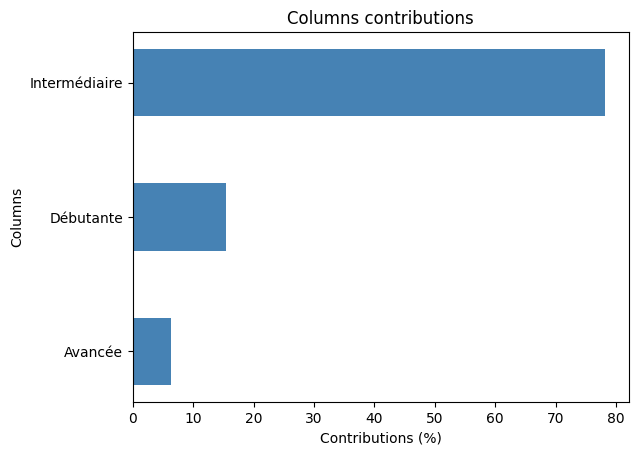

In [18]:
# Afficher la contribution des profils colonnes au deuxième axe factoriel
print("Second axe")  
afc.plot_col_contrib(num_axis=2) 

#### Interprétation

Intermédiaire : Contribution d'environ 78%. Cela signifie que cette catégorie a été déterminante pour caractériser cet axe.

Débutante : Contribution significative d'environ 17%, mais inférieure à celle de la classification intermédiaire. Elle a également joué un rôle important pour caractériser cet axe.

Avancée : Contribution plus faible, d'environ 6%. Cela signifie que cette catégorie a joué un rôle mineur dans la construction de cet axe factoriel.

### Analyse Graphique

#### Graphique superposition des profils lignes et colonnes

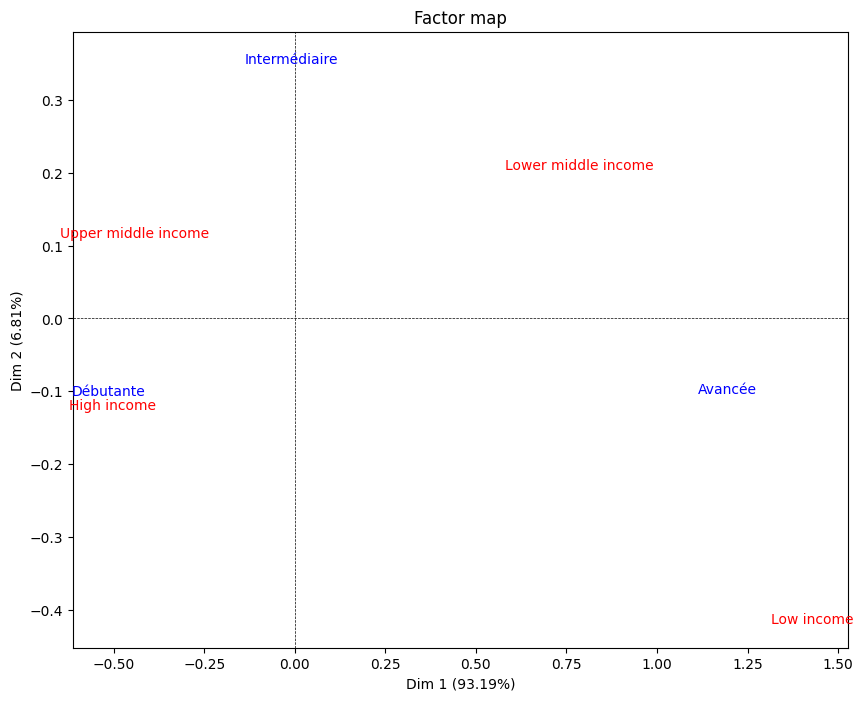

In [19]:
afc.mapping(1, 2, figsize=(10, 8))

**Dimensions et Explication de la Variance :**

   - La première dimension (Dim 1) explique 93.19% de la variance.
   - La deuxième dimension (Dim 2) explique 6.81%.
   - Ensemble, elles expliquent environ 100% de la variance, ce qui indique que ces deux dimensions capturent parfaitement bien la structure des données.
     
**Associations Clés :**

   - **High Income** : ces pays semblent associées à **Débutante** dans la partie inférieur gauche.
   - **Low Income** : Ils sont proches de **Avancée** dans la partie inférieur droite.
   - **Lower Middle Income** et **Upper Middle Income** : Ils sont situés près de **Intermédiaire**.
   - **Lower Middle Income** : ces pays sont également situés près de **Avancée**.

# Réponse à la question 1:  Existe-t-il une association entre les catégories de revenus des pays et leur dépendance aux énergies renouvelables ?

D'après nos interprétations (produits scalaires, Cos² et axes ) :
      Oui, il existe une association significative entre les catégories de revenus et la dépendance aux énergies renouvelables. Les pays à faible revenu tendent paradoxalement à avoir des classifications avancées, tandis que les pays à revenu élevé restent souvent dans des phases débutantes.

# Réponse à la question 2: Les pays avec des politiques énergétiques avancées sont-ils principalement issus de certaines catégories de revenus ?

D'après nos interprétations (Contributions, Cos², analyse par dimensions et analyse graphique) :
Oui, les pays avec des politiques énergétiques avancées proviennent principalement des catégories de revenus faibles ("Low Income") et intermédiaires inférieurs ("Lower Middle Income"). Les pays à faible revenu montrent une forte association positive avec la catégorie "Avancée", tandis que les pays à revenu intermédiaire inférieur présentent également une association positive avec cette catégorie.
En revanche, les pays à revenu élevé ("High Income") et intermédiaire supérieur ("Upper Middle Income") sont faiblement représentés dans cette catégorie.

# B. Analyse en Composante Principale (ACP)

## Objectif 

Identifier les principaux axes expliquant la variance dans l'adoption des énergies renouvelables à partir d'indicateurs économiques et sociaux .

## Questions posées


    1. Quels sont les principaux facteurs expliquant les variations dans l'adoption des énergies renouvelables (PIB, éducation, etc.) ?
	2. Quels axes principaux peuvent être extraits des indicateurs économiques  et sociaux pour expliquer la transition énergétique ?

## Données nécessaires :

    -Investissements dans les énergies renouvelables (% du PIB) : EG.ELC.RNWX.ZS.
    -PIB par habitant (en USD) : NY.GDP.PCAP.CD.
    -Taux de scolarisation dans le secondaire (% net) : SE.SEC.NENR

### Selection des Données Nécéssaires

In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection des colonnes spécifiques
data_acp = data[[
    "Investissements en énergies renouvelables (% du PIB)",
    "PIB par habitant (USD)",
    "Taux de scolarisation secondaire (%)"
]]

# Affichage des données sélectionnées
print(data_acp.head())

   Investissements en énergies renouvelables (% du PIB)  \
0                                           4.838663      
1                                           1.346697      
2                                           0.335375      
3                                           0.000000      
4                                           0.018654      

   PIB par habitant (USD)  Taux de scolarisation secondaire (%)  
0              415.707417                             47.154018  
1             1659.515290                             69.520690  
2             1568.724310                             69.520690  
3             8575.171134                             86.322940  
4             5364.027950                             69.520690  


# Préparation des données

On met les données sur une échelle comparable pour effectuer une analyse significative.

In [24]:
sc = StandardScaler()
# Centrage et réduction
Z = sc.fit_transform(data_acp)

# Matrice de nuage

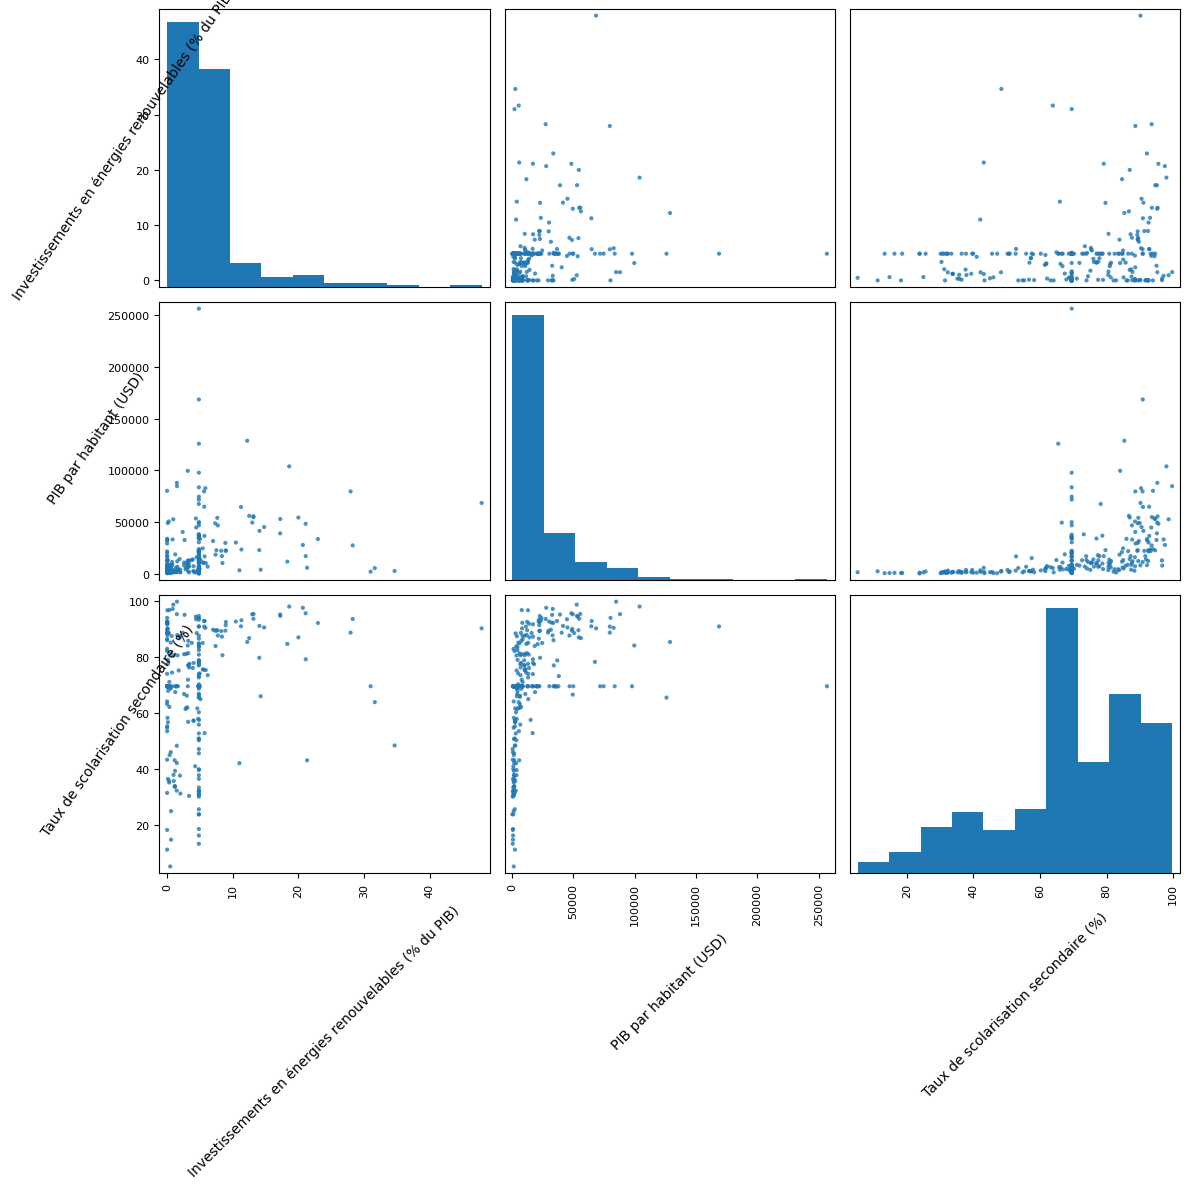

In [25]:
scatter_matrix = pd.plotting.scatter_matrix(
    data_acp,
    alpha=0.8,
    figsize=(12, 12),
    diagonal='hist'
)

# Personnaliser les axes pour rendre les labels plus lisibles
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=10, rotation=45)
    ax.set_ylabel(ax.get_ylabel(), fontsize=10, rotation=55)

plt.tight_layout()  # Pour éviter le chevauchement des éléments
plt.show()

#### Interprétation
### Observations générales :
1. **Distribution des variables (diagonale principale)** :
   - Chaque histogramme sur la diagonale montre la distribution d'une variable.
   - Par exemple :
     - Les **investissements en énergies renouvelables** sont concentrés vers des valeurs faibles (moins de 10 %).
     - Le **PIB par habitant** est fortement asymétrique, avec une majorité des pays ayant un PIB inférieur à 50 000 USD.
     - Le **taux de scolarisation secondaire** est réparti autour de 60 % à 100 %, indiquant une scolarisation élevée dans de nombreux pays.

2. **Relations entre les variables (hors diagonale)** :
   - **Investissements en énergies renouvelables vs. PIB par habitant** :
     - La densité de points est plus élevée pour les pays ayant un faible pourcentage d'investissements et un PIB faible ou modéré.
     - Aucun lien clair n'apparaît ici (pas de tendance linéaire visible).
   - **PIB par habitant vs. Taux de scolarisation secondaire** :
     - Une tendance semble indiquer qu'un PIB élevé est souvent associé à un taux de scolarisation secondaire élevé.
     - Cela reflète une possible corrélation positive entre développement économique et éducation.
   - **Investissements en énergies renouvelables vs. Taux de scolarisation secondaire** :
     - Il n'y a pas de tendance claire ; les points sont dispersés.

### Conclusions :
- Le PIB par habitant semble être positivement lié au taux de scolarisation secondaire.
- Les investissements en énergies renouvelables ne montrent pas de relation évidente avec les autres variables.
- Les distributions des données suggèrent une forte concentration autour de certaines valeurs (ex. PIB faible ou scolarisation élevée).

# ACP

In [26]:
#instanciation
acp = PCA()

#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_)

3


# Variances

In [27]:
#variance expliquée
print(acp.explained_variance_)

[1.59085907 0.83600704 0.58445464]


#### Interprétation
- La première valeur propre (**1.59**) est nettement dominante, représentant environ **53%** (1.59/3) de la variance totale.
- La deuxième valeur propre (**0.83**) représente environ **28%** de la variance.
- La dernière valeur propre est de (**0.58**),la plus faible parmi les valeurs présentes (**19%**) .

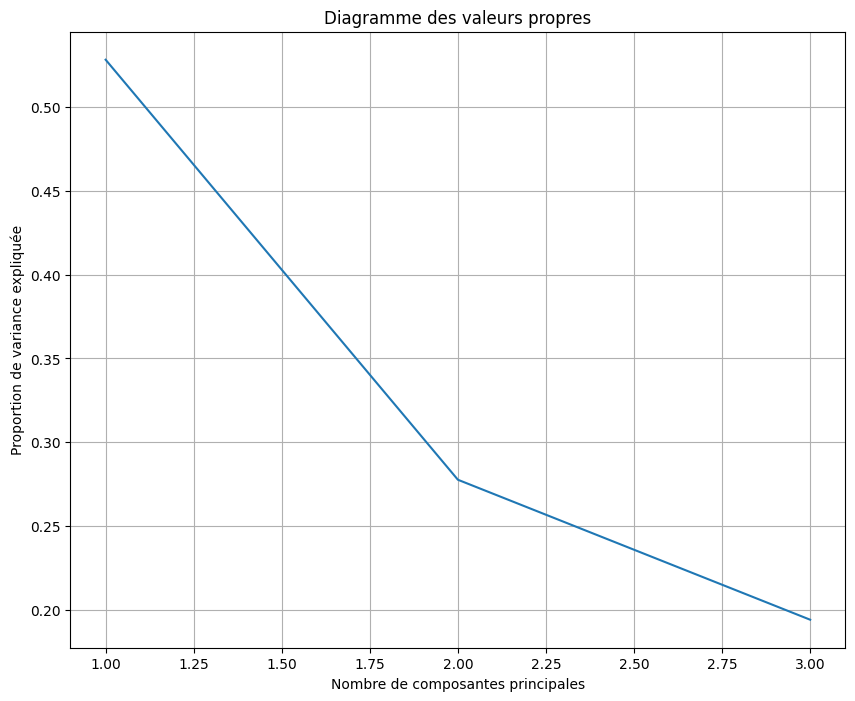

In [28]:
pca = PCA(n_components=len(data_acp.columns))
pca.fit(coord)

plt.figure(figsize=(10, 8))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Proportion de variance expliquée')
plt.title('Diagramme des valeurs propres')
plt.grid()
plt.show()

#### Interprétation

#### Première composante (CP1) :

- Elle explique environ **53%** de la variance totale (proportion ≈ 0.53).
- C'est la composante la plus importante, ce qui indique qu'elle capture une grande partie des variations présentes dans les données

#### Deuxième composante (CP2) :

- Elle explique environ **28%** de la variance (proportion ≈ 0.28).
- La nette "rupture" visible après cette composante (effet du coude dans le graphique) montre qu'à partir de cette composante, l'information ajoutée est beaucoup moins significative.

#### Troisième composantes (CP3)  :

- Elles expliquent chacune moins de **19%** de la variance (proportion ≈ 0.19).
- Cette composante contribue relativement peu à la description des données et semble moins pertinente que les deux composantes précédentes pour une analyse principale.

---

#### Conclusions :

- Le "coude" très marqué après la deuxième composante montre clairement qu'il serait judicieux de conserver que **2 composantes principales**.
- Avec ces 2 composantes, on atteint une couverture de **81%** de la variance totale, ce qui est excellent pour une réduction dimensionnelle efficace.
- La réduction de dimension de **3 à 2 variables** permet de simplifier l'analyse tout en préservant l'essentiel des informations contenues dans les données.

# Individus

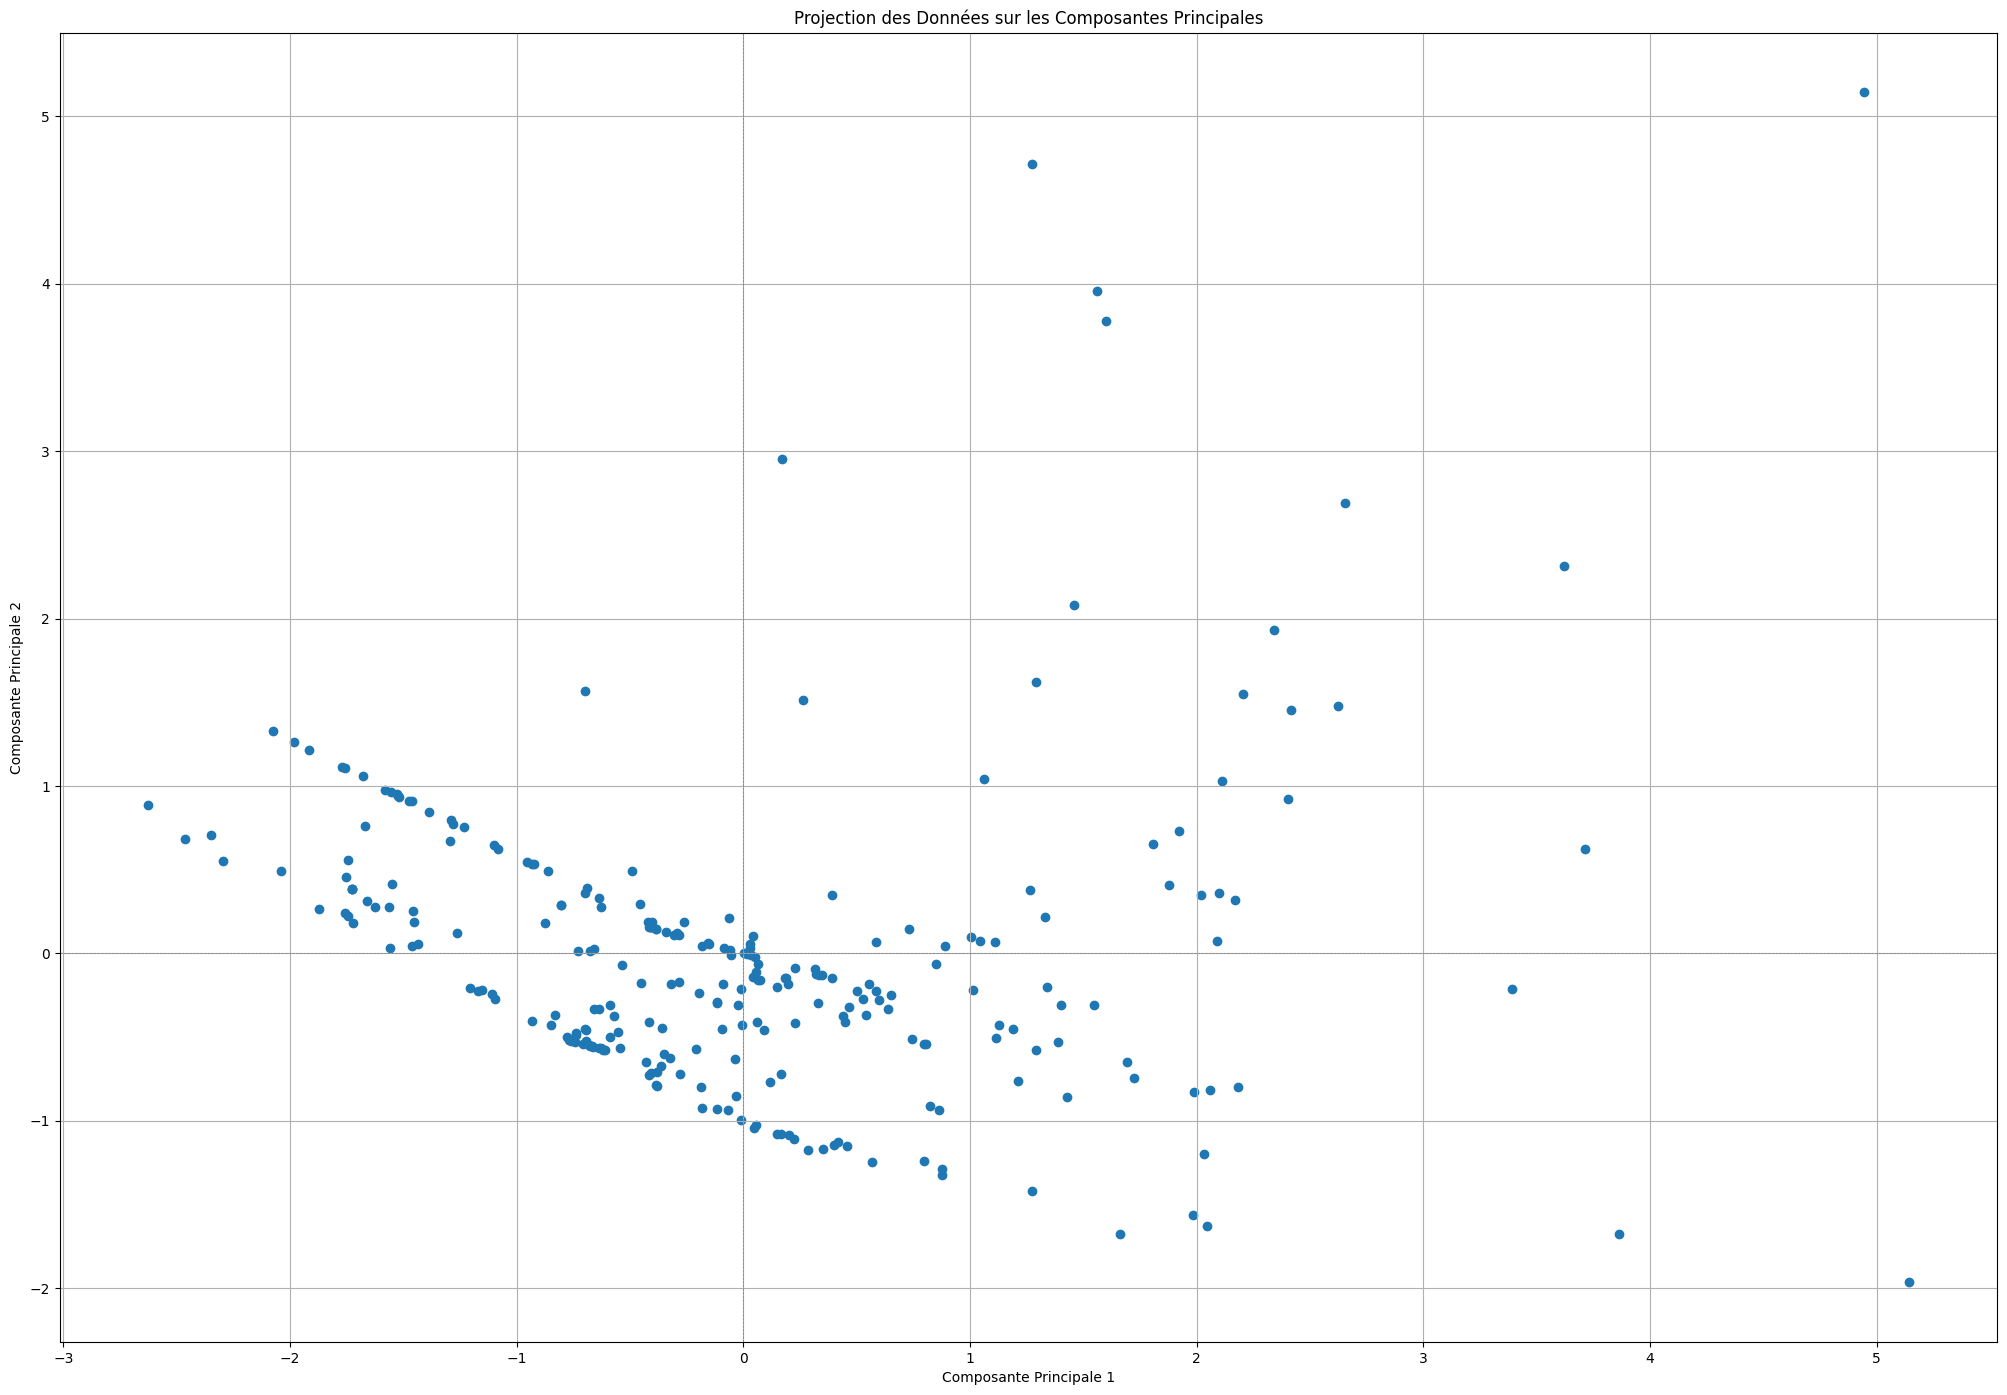

In [29]:
plt.figure(figsize=(25, 17))
plt.scatter(coord[:, 0], coord[:, 1])

# Boucle pour annoter les points avec les noms des pays
#for i in range(len(coord)):
 #   plt.annotate(data['Pays'].iloc[i], (coord[i, 0], coord[i, 1] + 0.1))

plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des Données sur les Composantes Principales')
plt.grid()
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.show()


#### Interprétation :
L'axe horizontal (Composante Principale 1) et l'axe vertical (Composante Principale 2) représentent les deux principales dimensions qui expliquent la plus grande part de variance dans les données. Ensemble, elles capturent environ 81% de la variance totale.

Distribution des Points :

Chaque point représente un pays. La position du point dans cet espace bidimensionnel montre comment le pays se situe par rapport aux deux composantes principales.

Les points qui sont proches les uns des autres dans ce graphique sont des pays qui présentent des similarités en termes des variables étudiées (Investissements en énergies renouvelables, PIB par habitant, et taux de scolarisation secondaire).

Sur CP1, la plupart des points s'étalent de -3 à 3, ce qui est une grande dispersion.
Pour CP2, la plupart des points s'étalent de -2 à 2, ce qui est également une grande dispersion


# Variables

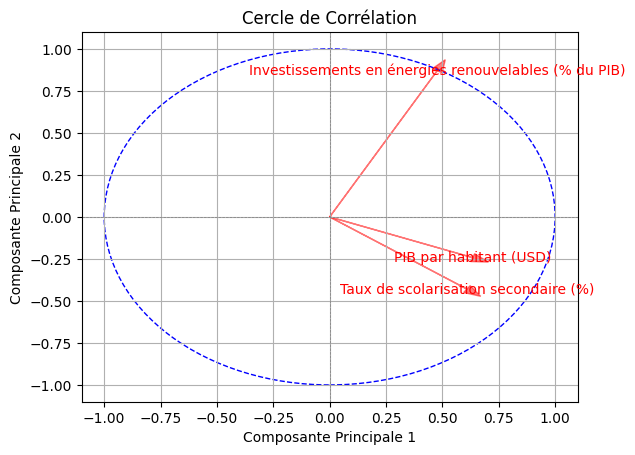

In [30]:
acp = PCA(n_components=2)
coord = acp.fit_transform(Z)
components = acp.components_
for i, (x, y) in enumerate(components.T):
    plt.arrow(0, 0, x, y, color='r', alpha=0.5, head_width=0.05)
    plt.text(x, y, data_acp.columns[i], color='r', ha='center', va='center')

# Tracer un cercle, alpha=0.5
circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et ajouter des labels
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Cercle de Corrélation')
plt.grid()
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.show()

#### Interprétation :
    -Investissements en énergies renouvelables et CP2: Il existe une corrélation forte et spécifique entre les investissements en énergies renouvelables et la deuxième composante principale. 
    
    -PIB par habitant et CP1: Le PIB par habitant est fortement corrélé à la première composante principale
    
    -Taux de scolarisation et CP1: Le taux de scolarisation est également corrélé à la première composante principale, mais moins fortement que le PIB.
    
    -Angle entre les vecteurs: L'angle quasi droit entre les vecteurs représentant les investissements en énergies renouvelables et les autres variables suggère que ces investissements sont relativement indépendants des autres facteurs considérés. Contrairement au PIB et le taux de scolarisatation secondaire qui indiquent une certaine corrélation vu le petit angle entre ces deux variables.
    
    -Les investissements sont le mieux  représentée dans ce plan (flèche plus longue).

    -La Composante Principale 1 (axe horizontal) est liée au PIB et le taux de scolarisation, bien que moins à cette dernière.
    -La Composante Principale 2 (axe vertical) est fortement influencée les investissements

# Réponse à la question 1: Quels sont les principaux facteurs expliquant les variations dans l'adoption des énergies renouvelables (PIB, éducation, etc.) ?

Les principaux facteurs identifiés sont :

    Investissements en énergies renouvelables (% du PIB) : Ils sont représentés par la Composante Principale 2 (CP2) et sont relativement indépendants des autres variables économiques et sociales.
    PIB par habitant : Fortement lié à la Composante Principale 1 (CP1). Un PIB plus élevé favorise des investissements en énergies renouvelables indirectement via des impacts sur les structures économiques.
    Taux de scolarisation dans le secondaire (%) : Corrélé au PIB (corrélation plus faible avec CP1).On pourrait déduire que ce facteur influence indirectement les investissements en énergies renouvelables via une meilleure éducation et sensibilisation

# Réponse à la question 2: Quels axes principaux peuvent être extraits des indicateurs économiques  et sociaux pour expliquer la transition énergétique ?

    Composante Principale 1 (CP1) : Liée principalement au PIB par habitant et au taux de scolarisation. Elle reflète un axe socio-économique général qui englobe les conditions favorables à l'adoption des énergies renouvelables (richesse et éducation).

    Composante Principale 2 (CP2) : Liée spécifiquement aux investissements en énergies renouvelables. Cette composante mesure directement l’engagement financier des pays dans la transition énergétique, indépendamment du PIB et de l'éducation.

En bref, CP1 reflète les conditions socio-économiques globales, tandis que CP2 reflète l'effort financier spécifique des pays pour la transition énergétique.

# C. Analyse de l'Impact du Revenu National sur l'Adoption des Énergies Renouvelables : Une Étude à l'Aide de l'ANOVA  (ANOVA à un facteur)

## Problématique

  L'adoption des énergies renouvelables varie considérablement à travers le monde, influencée par une multitude de facteurs économiques, sociaux et politiques. Parmi ces facteurs, le revenu national des pays joue un rôle crucial. 
  
  **L'une des questions centrales dans l'étude de la transition énergétique mondiale est de savoir si les pays à revenu élevé adoptent de manière significativement plus importante les énergies renouvelables que les pays à revenu plus faible. Cette question soulève une interrogation fondamentale sur l’impact des ressources économiques sur la transition énergétique mondiale.**

  L'objectif est de comparer le taux d'adoption des énergies renouvelables entre les groupes de pays classés par revenu (High income, Low income, Lower middle income, Upper middle income). En utilisant une **ANOVA à un facteur (One-Way ANOVA)**, nous testerons si le taux d'énergie renouvelable est statistiquement différent entre les groupes de pays en fonction de leur niveau de revenu.

  L'ANOVA permet de vérifier si les différences observées dans les taux d'énergie renouvelable sont significatives et non dues au hasard. Ce test statistique nous aidera à déterminer s'il existe une relation entre le niveau de revenu d'un pays et son taux d'adoption des énergies renouvelables.

**le revenu national a-t-il un impact significatif sur l'adoption des énergies renouvelables dans les différents groupes de pays ?**
----

## Étape 1 : Importation des bibliothèques nécessaires

In [1]:
# on a importé les bibliothèques nécessaires.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, shapiro, levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms

## Étape 2 : Chargement et exploration des données

In [2]:
# Charger le fichier CSV contenant les données
df = pd.read_csv("transition_energetique_pays_2023.csv")

# Afficher les premières lignes pour vérifier la structure des données
print(df.head())

                          Pays  Taux d'énergie renouvelable  Année  \
0                  Afghanistan                    17.846154   2023   
1  Africa Eastern and Southern                    62.614134   2023   
2   Africa Western and Central                    77.223132   2023   
3                      Albania                    39.283333   2023   
4                      Algeria                     0.150000   2023   

   Investissements en énergies renouvelables (% du PIB)  \
0                                           4.838663      
1                                           1.346697      
2                                           0.335375      
3                                           0.000000      
4                                           0.018654      

   PIB par habitant (USD)  Taux de scolarisation secondaire (%)  \
0              415.707417                             47.154018   
1             1659.515290                             69.520690   
2             1568.7243

In [3]:
# Vérification des colonnes et des types de données
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Pays                                                  266 non-null    object 
 1   Taux d'énergie renouvelable                           266 non-null    float64
 2   Année                                                 266 non-null    int64  
 3   Investissements en énergies renouvelables (% du PIB)  266 non-null    float64
 4   PIB par habitant (USD)                                266 non-null    float64
 5   Taux de scolarisation secondaire (%)                  266 non-null    float64
 6   Accès à l'électricité (%)                             266 non-null    float64
 7   Revenu                                                266 non-null    object 
 8   Dépassement 50%                                       266 no

## Étape 3 : Préparation des données

In [5]:
# créons un DataFrame avec les colonnes nécessaires pour l'ANOVA, à savoir ('Pays', 'Taux d\'énergie renouvelable', 'Revenu').
df_anova = df[['Pays', 'Taux d\'énergie renouvelable', 'Revenu']]

#### 2-Vérifier la distribution des données.

Avant de procéder à l'ANOVA, il est important de vérifier si les groupes sont correctement formés (par revenu) et de s'assurer qu'il y a assez de données dans chaque groupe pour que l'ANOVA soit significative.

In [6]:
# Vérification du nombre de pays dans chaque groupe de revenu
group_counts = df_anova.groupby('Revenu')['Pays'].count()
print(group_counts)

Revenu
High income            106
Low income              23
Lower middle income     66
Upper middle income     71
Name: Pays, dtype: int64


In [7]:
# Vérification des statistiques descriptives
print(df_anova.describe())

       Taux d'énergie renouvelable
count                   266.000000
mean                     29.667803
std                      27.240385
min                       0.000000
25%                       7.401923
50%                      21.750203
75%                      46.682692
max                      95.833333


   - La distribution des taux d'énergie renouvelable est large, avec une moyenne d'environ 29.67% mais une grande variabilité (écart type de 27.24%).
   - Les valeurs extrêmes (0% et 95.83%) montrent qu'il existe à la fois des pays avec une adoption très faible et d'autres avec une adoption très élevée des énergies renouvelables.

**a-Boxplot pour visualiser la distribution des taux d'adoption des énergies renouvelables selon les groupes de revenu :**

Le diagramme en boîte à moustaches ci-dessous montre la répartition des taux d'adoption des énergies renouvelables en fonction des groupes de revenu.

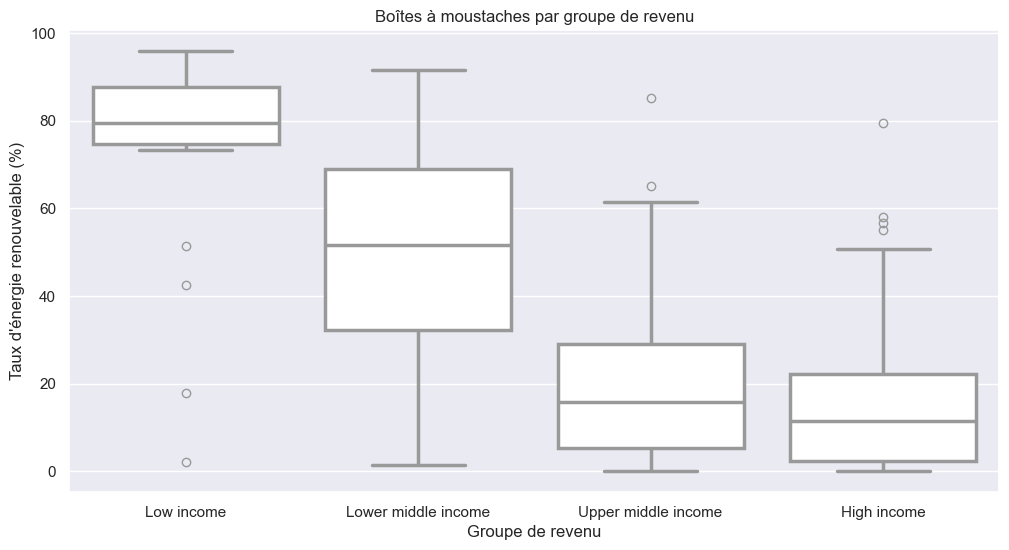

In [8]:
# Appliquer le style par défaut de seaborn
sns.set()

plt.figure(figsize=(12, 6))  

# Créer le boxplot pour visualiser la distribution des taux d'énergie renouvelable par groupe de revenu
ax = sns.boxplot(x="Revenu", y="Taux d'énergie renouvelable", data=df_anova, color='white', linewidth=2.5)

# Ajouter les labels et le titre
plt.xlabel('Groupe de revenu')
plt.ylabel('Taux d\'énergie renouvelable (%)')
plt.title('Boîtes à moustaches par groupe de revenu')

# Afficher le graphique
plt.show()

   - **Low income** : 
     - Ce groupe montre un taux d'énergie renouvelable élevé, avec une médiane autour de 80 %. La boîte est étroite, indiquant une faible variation entre les pays de ce groupe.
     - La majorité des données sont concentrées autour de la médiane, indiquant une adoption élevée des énergies renouvelables.

   - **Lower middle income** :
     - Médiane intermédiaire: La médiane se situe autour de 50%, montrant une adoption modérée des énergies renouvelables.
     - Large gamme: Les taux d'adoption varient considérablement, indiquant une diversité dans l'adoption des énergies renouvelables parmi ces pays (de ce groupe).

   - **Upper middle income** :
     - Médiane inférieure: La médiane est autour de 18%, ce qui signifie une adoption plus faible des énergies renouvelables.
     - Quelques valeurs aberrantes au-dessus de 80 % suggèrent que certains pays dans ce groupe utilisent un taux d'énergie renouvelable très élevé.

   - **High income** :
     - Médiane basse: La médiane est proche de 10%, indiquant que les pays à revenu élevé ont généralement des taux d'adoption plus faibles.
     - Certains pays à revenu élevé adoptent beaucoup plus d'énergies renouvelables que la moyenne de leur groupe.

**b-Histogramme du taux d'énergie renouvelable par revenu**

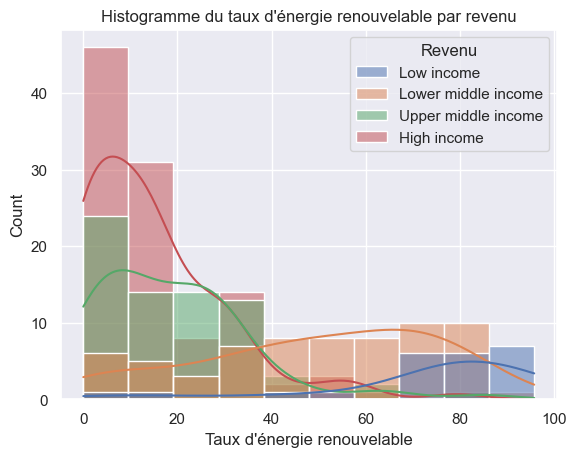

In [9]:
sns.histplot(data=df_anova, x='Taux d\'énergie renouvelable', hue='Revenu', kde=True)
plt.title("Histogramme du taux d'énergie renouvelable par revenu")
plt.show()

**Low Income (Faible Revenu) :**
- Pic au-dessus de 80 % : La majorité des pays à faible revenu ont des taux d'adoption des énergies renouvelables autour de 80 %.
- Distribution concentrée : Une grande concentration de pays adopte des niveaux élevés de renouvelables.
  
**Lower Middle Income (Revenu Intermédiaire Inférieur) :**

- Pic entre 40 % et 75 % : La distribution montre une adoption modérée des énergies renouvelables.
- Varieté Modérée : La distribution est plus large, indiquant une certaine variation dans l'adoption des énergies renouvelables parmi ces pays(de ce groupe).

**Upper Middle Income (Revenu Intermédiaire Supérieur) :**

- Pic autour de 5 % à 30 % : Ce groupe montre un taux d'adoption plus bas, avec la majorité des pays autour de 5 % à 30 %.
- avec quelques pays adoptant beaucoup plus les énergies renouvelables.

**High Income (Revenu Élevé) :**

- Pic à 2 % à 20 % : Les pays à revenu élevé montrent une adoption des énergies renouvelables plus faible.
- Bien que la majorité des pays soient entre 2 % et 20 %, il y a des outliers significatifs qui adoptent à des taux beaucoup plus élevés.

**Conclusion :**

Les pays à faible revenu semblent avoir une adoption des énergies renouvelables plus élevée, potentiellement due à leur dépendance sur des sources d'énergie renouvelables traditionnelles.

Les pays à revenu intermédiaire montrent une gamme plus variée d'adoption, reflétant des différences dans l'accès aux ressources et aux technologies.

Les pays à revenu élevé ont une adoption plus faible mais avec une variabilité significative, probablement due à une diversité dans les choix énergétiques disponibles et les politiques environnementales.

## Étape 4 : Effectuer l'ANOVA pour tester l'influence du revenu sur le taux d'énergie renouvelable

#### 1-Formulation des Hypothèses 

**L'hypothèse nulle (H₀)** stipule que :  
Les groupes de revenu (Low income, Lower middle income, Upper middle income, High income) n’ont pas d’effet significatif sur le taux d’énergie renouvelable.  
En d'autres termes, les moyennes des taux d'énergie renouvelable sont égales entre les groupes.  

H₀ : μ₁ = μ₂ = μ₃ = μ₄  
où :  
- μ₁ : Moyenne pour le groupe "Low income"  
- μ₂ : Moyenne pour le groupe "Lower middle income"  
- μ₃ : Moyenne pour le groupe "Upper middle income"  
- μ₄ : Moyenne pour le groupe "High income"  

**L'hypothèse alternative (H₁)** stipule que :  
Les groupes de revenu influencent significativement le taux d’énergie renouvelable.  
Cela signifie qu’au moins une moyenne diffère des autres.  

H₁ : ∃ i, j tels que μᵢ ≠ μⱼ  

#### 2-Effectuer l'ANOVA pour tester l'influence de la catégorie de revenu sur le taux d'énergie renouvelable

In [10]:
# Effectuer l'ANOVA pour tester l'influence de la catégorie de revenu sur le taux d'énergie renouvelable
anova_renewable = smf.ols('Q("Taux d\'énergie renouvelable") ~ Revenu', data=df_anova).fit()

# Résumé des résultats de l'ANOVA
print(anova_renewable.summary())

                                   OLS Regression Results                                   
Dep. Variable:     Q("Taux d'énergie renouvelable")   R-squared:                       0.518
Model:                                          OLS   Adj. R-squared:                  0.513
Method:                               Least Squares   F-statistic:                     94.01
Date:                              Fri, 03 Jan 2025   Prob (F-statistic):           2.53e-41
Time:                                      11:06:10   Log-Likelihood:                -1158.8
No. Observations:                               266   AIC:                             2326.
Df Residuals:                                   262   BIC:                             2340.
Df Model:                                         3                                         
Covariance Type:                          nonrobust                                         
                                    coef    std err          t      P>

A-**R² = 0.518** : Cela signifie que 51,8 % de la variation du taux d'énergie renouvelable est expliquée par les groupes de revenu.

B-**F-statistic (94.01) et Prob(F-statistic) (2.53e-41) :**

-La valeur de la statistique F est élevée et le p-value est extrêmement faible, ce qui permet **de rejeter l'hypothèse nulle (H₀)**. Cela signifie que les groupes de revenu ont un effet significatif sur le taux d'énergie renouvelable.

C-**Coefficients :**

1. **Intercept : 14.8523**
   - Ce coefficient représente la valeur moyenne prédite du taux d'énergie renouvelable pour la catégorie de référence, qui est **"High income"** (les catégories de revenu sont codées de manière dummy). En moyenne, les pays à revenu élevé ont un taux d'énergie renouvelable de 14,85 %.

2. **Revenu[T.Low income] : 58.8122**
   - Les pays à faible revenu (Low income) ont, en moyenne, un taux d'énergie renouvelable **58,81 % plus élevé** que les pays à revenu élevé. Ce résultat est hautement significatif (p < 0.001).

3. **Revenu[T.Lower middle income] : 34.7123**
   - Les pays à revenu intermédiaire inférieur (Lower middle income) ont, en moyenne, un taux d'énergie renouvelable **34,71 % plus élevé** que les pays à revenu élevé. Ce résultat est également hautement significatif (p < 0.001).

4. **Revenu[T.Upper middle income] : 4.1865**
   - Les pays à revenu intermédiaire supérieur (Upper middle income) ont un taux d'énergie renouvelable **4,18 % plus élevé** que les pays à revenu élevé. Cependant, ce résultat **n'est pas statistiquement significatif** (p = 0.152).

#### 3-Conclusion

- Les groupes de revenu influencent significativement le taux d'énergie renouvelable.
  
- Les groupes "Low income" et "Lower middle income" montrent des différences significatives par rapport au groupe "High income".
  
- Le groupe "Upper middle income" n'est pas significativement différent du groupe "High income".
  
- Les pays à faible revenu avoir une adoption des énergies renouvelables plus élevée.

- Les pays à revenu intermédiaire montrent une gamme plus variée d'adoption.

- Les pays à revenu élevé ont une adoption plus faible 

## Étape 5 : Appliquer le test post-hoc de Tukey

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1              group2       meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------------------
        High income          Low income  58.8122    0.0  47.5046  70.1198   True
        High income Lower middle income  34.7123    0.0  27.0045  42.4201   True
        High income Upper middle income   4.1865 0.4781  -3.3521  11.7252  False
         Low income Lower middle income -24.0999    0.0 -36.0027 -12.1971   True
         Low income Upper middle income -54.6256    0.0 -66.4197 -42.8316   True
Lower middle income Upper middle income -30.5257    0.0  -38.931 -22.1205   True
--------------------------------------------------------------------------------


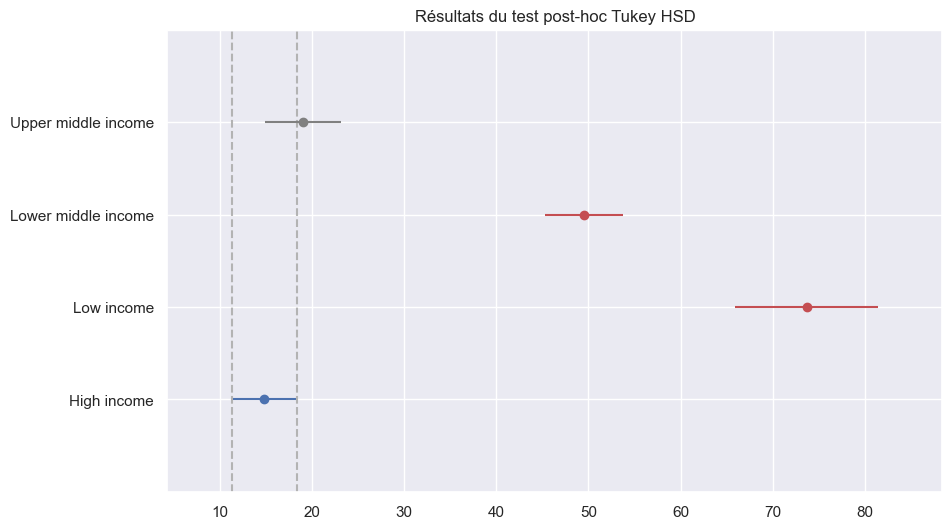

In [11]:
# Appliquer le test post-hoc de Tukey
tukey_result = pairwise_tukeyhsd(
    endog=df_anova["Taux d'énergie renouvelable"],  # Variable dépendante
    groups=df_anova["Revenu"],                     # Variable indépendante (groupes)
    alpha=0.05                                     # Niveau de signification
)

# Afficher les résultats du test
print(tukey_result)

# Visualiser les résultats
tukey_result.plot_simultaneous(comparison_name='High income', figsize=(10, 6))
plt.title("Résultats du test post-hoc Tukey HSD")
plt.show()


- Axe Y : Représente les différentes catégories de revenus.
- Axe X : Indique la différence des moyennes entre les groupes.

----------

- Low income :
A un taux d'énergie renouvelable significativement plus élevé que tous les autres groupes.
- High income :
Montre des taux d'énergie renouvelable similaires aux pays Upper middle income, mais nettement inférieurs à ceux des groupes Low income et Lower middle income.

-------

Le test post-hoc de Tukey montre des différences claires et significatives entre les groupes de revenus en termes de taux d'énergie renouvelable, à l'exception d'une similitude entre les groupes High Income et Upper Middle Income. 

Réponse à la question : le revenu national a-t-il un impact significatif sur l'adoption des énergies renouvelables dans les différents groupes de pays ?
----

- Oui, le revenu national a un impact significatif sur l'adoption des énergies renouvelables. Les pays à faible revenu et à revenu intermédiaire inférieur adoptent les énergies renouvelables dans une proportion plus importante, tandis que l'impact dans les pays à revenu intermédiaire supérieur et élevé est moins marqué, avec une adoption des énergies renouvelables plus faible.

- Cela peut être justifié par le fait que les pays à revenu faible ou intermédiaire inférieur sont souvent plus vulnérables aux changements climatiques et aux défis énergétiques, ce qui les pousse à adopter des solutions d'énergie renouvelable plus rapidement. En revanche, les pays riches peuvent disposer d'infrastructures énergétiques plus complexes et être davantage dépendants des énergies fossiles, ce qui limite leur transition vers les énergies renouvelables.

## Conclusion

   Les résultats suggèrent qu'il est important de reconsidérer l'hypothèse selon laquelle les pays à revenu élevé adoptent systématiquement plus d'énergies renouvelables. Plusieurs facteurs pourraient expliquer cette observation :
   
1. **Politiques internationales et aides au développement** : Les pays à faible revenu peuvent être incités à adopter des énergies renouvelables par des accords internationaux ou des subventions qui facilitent l'accès à ces technologies.
2. **Contraintes et opportunités spécifiques** : Les pays à revenu faible ou intermédiaire inférieur peuvent être plus vulnérables aux changements climatiques et aux défis énergétiques, ce qui pourrait les pousser à adopter des solutions d'énergie renouvelable plus rapidement. En revanche, les pays riches peuvent avoir des infrastructures énergétiques plus complexes et une dépendance plus marquée aux énergies fossiles.
3. **Technologies de diffusion rapide** : Les innovations dans les énergies renouvelables, telles que l'énergie solaire, sont de plus en plus accessibles à faible coût, ce qui pourrait expliquer leur adoption rapide dans des pays avec des ressources économiques limitées.

L'hypothèse de base selon laquelle les pays à revenu élevé adopteraient plus d'énergies renouvelables que les pays à revenu faible est remise en question par les résultats. En réalité, les pays à faible revenu et à revenu intermédiaire inférieur semblent adopter des énergies renouvelables à un taux plus élevé, potentiellement en raison de facteurs politiques et de contraintes énergétiques spécifiques. Cette analyse met en lumière la complexité de la transition énergétique mondiale, qui ne dépend pas uniquement des ressources économiques, mais aussi de facteurs externes tels que les politiques internationales, les aides au développement, et les besoins énergétiques immédiats des pays.

# D. Régression Linéaire Multiple

## Introduction  

La régression linéaire multiple est une méthode statistique qui permet d'étudier et de modéliser la relation entre une variable dépendante (ou cible) et plusieurs variables explicatives (ou prédictrices). Elle est particulièrement utile pour comprendre comment différents facteurs contribuent simultanément à un phénomène observé.  

Dans le contexte de la transition énergétique, une question clé est de savoir quels sont les facteurs économiques et sociaux qui influencent le pourcentage d'énergie renouvelable dans le mix énergétique des pays. Cette problématique est cruciale pour aider les décideurs à concevoir des politiques efficaces pour encourager l’adoption des énergies renouvelables.  

#### Problématique  
**Quels sont les déterminants économiques et sociaux qui influencent la proportion d'énergies renouvelables dans le mix énergétique des pays, et dans quelle mesure ces facteurs interagissent-ils pour façonner la transition énergétique ?** 

#### Variables utilisées  
1. **Variable cible (dépendante)** :  
   - Pourcentage d'énergie renouvelable dans le mix énergétique (**EG.FEC.RNEW.ZS**).  

2. **Variables explicatives (indépendantes)** :  
   - **PIB par habitant** (**NY.GDP.PCAP.CD**) : indicateur économique reflétant le niveau de développement économique d’un pays.  
   - **Investissements dans les énergies renouvelables** (**EG.ELC.RNWX.ZS**) : pourcentage du PIB investi dans les énergies renouvelables.
   - **Accès à l'électricité (% de la population)** (**EG.ELC.ACCS.ZS**) : Reflète le niveau d'infrastructure énergétique.  

#### Objectifs de l'étude  
1. **Analyser l'impact des variables explicatives** sur la proportion d'énergie renouvelable dans le mix énergétique.  
2. **Quantifier l'effet de chaque facteur** pour déterminer les leviers les plus efficaces dans la transition énergétique.  
3. **Proposer des recommandations politiques** pour renforcer l'adoption des énergies renouvelables.

## Étape 1 : Importation des bibliothèques nécessaires

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as mb
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_white
from sklearn import metrics
from sklearn.metrics import r2_score
from scipy.stats import norm

## Étape 2 : Chargement et exploration des données

In [2]:
data = pd.read_csv('transition_energetique_pays_2023.csv')

In [14]:
# Affichage des premières lignes
print(data.head())

                          Pays  Taux d'énergie renouvelable  Année  \
0                  Afghanistan                    17.846154   2023   
1  Africa Eastern and Southern                    62.614134   2023   
2   Africa Western and Central                    77.223132   2023   
3                      Albania                    39.283333   2023   
4                      Algeria                     0.150000   2023   

   Investissements en énergies renouvelables (% du PIB)  \
0                                           4.838663      
1                                           1.346697      
2                                           0.335375      
3                                           0.000000      
4                                           0.018654      

   PIB par habitant (USD)  Taux de scolarisation secondaire (%)  \
0              415.707417                             47.154018   
1             1659.515290                             69.520690   
2             1568.7243

In [15]:
# Vérification des colonnes et des types de données
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Pays                                                  266 non-null    object 
 1   Taux d'énergie renouvelable                           266 non-null    float64
 2   Année                                                 266 non-null    int64  
 3   Investissements en énergies renouvelables (% du PIB)  266 non-null    float64
 4   PIB par habitant (USD)                                266 non-null    float64
 5   Taux de scolarisation secondaire (%)                  266 non-null    float64
 6   Accès à l'électricité (%)                             266 non-null    float64
 7   Revenu                                                266 non-null    object 
 8   Dépassement 50%                                       266 no

## Étape 3 : Préparation des données

In [3]:
data_regression = data[['Taux d\'énergie renouvelable', 'PIB par habitant (USD)', 
                                'Investissements en énergies renouvelables (% du PIB)', 
                                'Accès à l\'électricité (%)']]

#### 2-Vérifier la distribution des données.

In [18]:
# Vérification des statistiques descriptives
print(data_regression.describe())

       Taux d'énergie renouvelable  PIB par habitant (USD)  \
count                   266.000000              266.000000   
mean                     29.667803            19801.484066   
std                      27.240385            29241.462131   
min                       0.000000              193.007146   
25%                       7.401923             2478.681863   
50%                      21.750203             8142.831461   
75%                      46.682692            23249.998705   
max                      95.833333           256580.515123   

       Investissements en énergies renouvelables (% du PIB)  \
count                                         266.000000      
mean                                            4.838663      
std                                             6.285018      
min                                             0.000000      
25%                                             0.569904      
50%                                             4.838663      


1. **Taux d'énergie renouvelable** :
   - Moyenne : ~29.67%, avec une forte variabilité (écart-type ~27.24%).
   - Large amplitude : de 0% (aucune énergie renouvelable) à 95.83% (quasi-totalité).
   - **Conclusion** : Les pays présentent des niveaux très hétérogènes de transition énergétique.

2. **PIB par habitant (USD)** :
   - Moyenne : ~19,801 USD, mais une grande disparité (écart-type ~29,241 USD).
   - Écarts extrêmes : ~193 USD (pays pauvres) à ~256,580 USD (pays riches).
   - **Conclusion** : Le développement économique varie fortement entre les pays.

3. **Investissements en énergies renouvelables (% du PIB)** :
   - Moyenne : ~ 4.84%, avec un écart-type élevé (~6.29%).
   - Concentration autour de la médiane (~ 4.84%) et certains pays atteignent des pics (~47.94%).
   - **Conclusion** : Les investissements restent modestes pour beaucoup de pays, mais certains se démarquent.

4. **Accès à l'électricité (%)** :
   - Moyenne : ~83.58%, mais des écarts importants (écart-type ~25.29%).
   - Large gamme : 5.12% (infrastructures faibles) à 100% (infrastructures complètes).
   - **Conclusion** : Bien que l’accès à l’électricité soit globalement élevé, certains pays ont encore un déficit important.

## Étape 4 : Analyse exploratoire

#### 1-visualiser les relations entre les variables explicatives et la variable cible

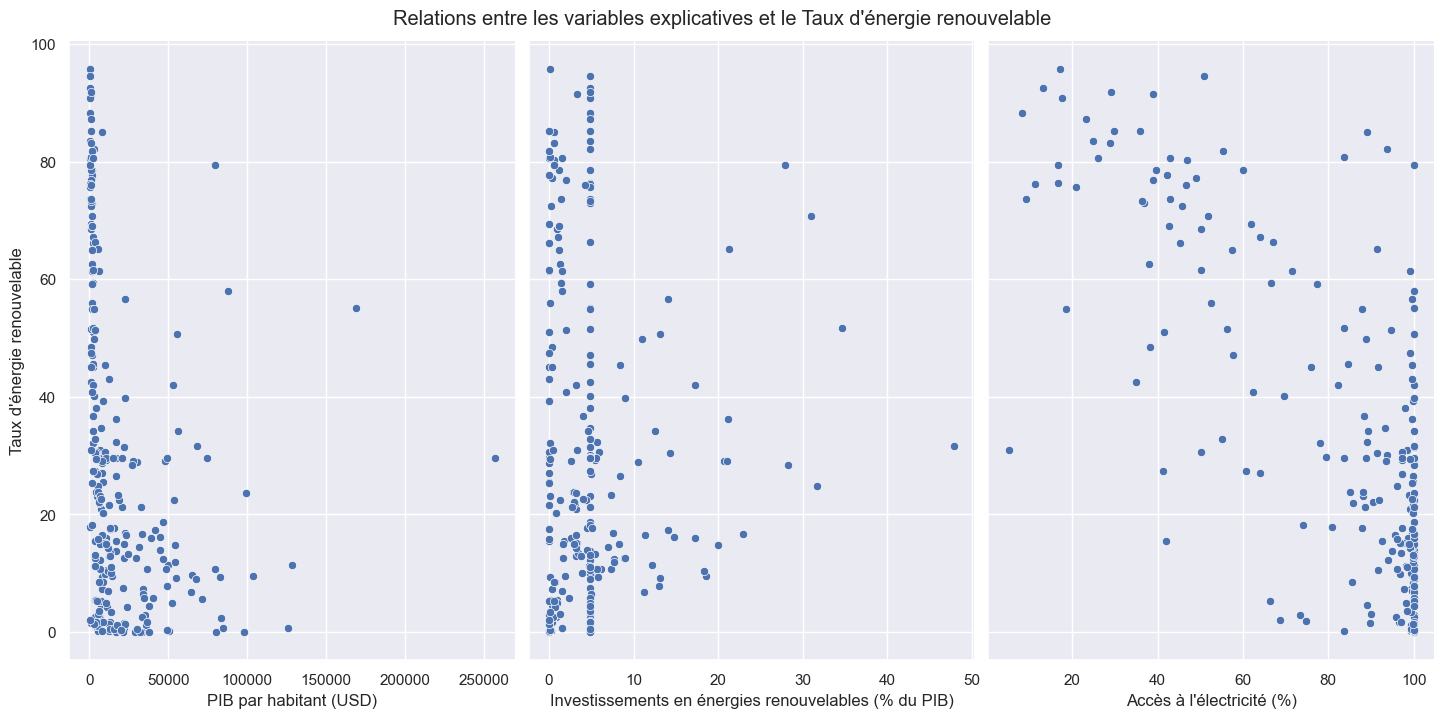

In [19]:
# Créer un pairplot pour visualiser les relations entre les variables explicatives et la variable cible
sns.pairplot(
    data_regression,
    x_vars=[
        "PIB par habitant (USD)", 
        "Investissements en énergies renouvelables (% du PIB)", 
        "Accès à l'électricité (%)"
    ],
    y_vars="Taux d'énergie renouvelable",
    height=7,
    aspect=0.7
)

plt.suptitle("Relations entre les variables explicatives et le Taux d'énergie renouvelable", y=1.02)
plt.show()

voici une interprétation des relations entre les variables explicatives et **la variable cible (Taux d'énergie renouvelable)** :

##### 1. **PIB par habitant (USD)** :
- La majorité des pays ayant un taux élevé d'énergie renouvelable ont un PIB par habitant relativement faible (en dessous de 50 000 USD). 
- Une tendance inverse peut être perçue : plus le PIB par habitant augmente, plus le taux d'énergie renouvelable tend à diminuer. Cependant, cette relation semble très dispersée.

##### 2. **Investissements en énergies renouvelables (% du PIB)** :
- Il semble y avoir une corrélation légèrement positive : certains pays avec des investissements plus élevés en pourcentage du PIB tendent à avoir des taux d'énergie renouvelable élevés.
- Cependant, la plupart des données sont concentrées autour de faibles pourcentages d'investissements, et la relation reste peu marquée.

##### 3. **Accès à l'électricité (%)** :
- Une majorité de points se situent dans la région où l'accès à l'électricité est proche de 100 %. Cela montre que de nombreux pays dans l'ensemble de données ont une bonne couverture électrique.
- Une relation inverse semble exister : les pays avec un taux d'accès élevé à l'électricité tendent à avoir un taux d'énergie renouvelable plus faible.

#### 2-Matrice de corrélation

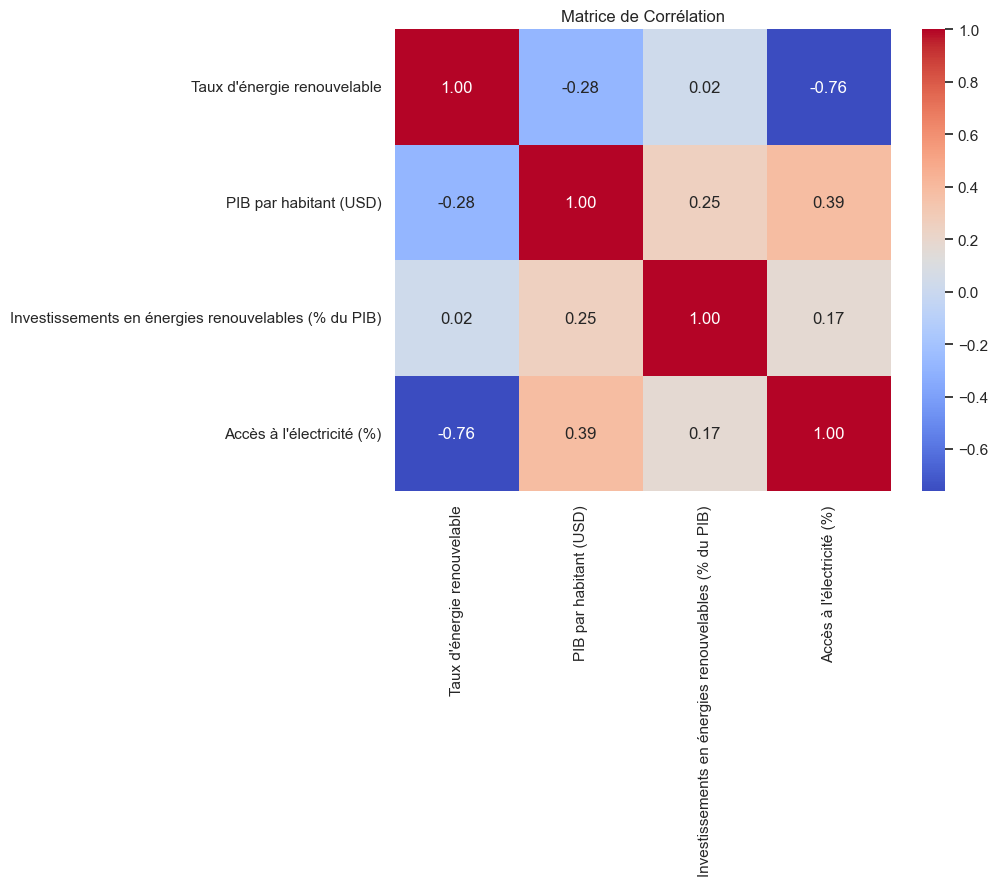

In [20]:
# Calcul de la matrice de corrélation
correlation_matrix = data_regression.corr()

# Affichage de la matrice de corrélation avec une heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrice de Corrélation")
plt.show()

##### Relations importantes
1. **Taux d'énergie renouvelable et Accès à l'électricité (%):**
   - Corrélation : **-0.76**
   - Interprétation : Forte corrélation négative. Cela signifie qu'à mesure que l'accès à l'électricité augmente, le taux d'énergie renouvelable tend à diminuer dans les données.

2. **Taux d'énergie renouvelable et PIB par habitant (USD):**
   - Corrélation : **-0.28**
   - Interprétation : Faible corrélation négative. Une augmentation du PIB par habitant est légèrement associée à une diminution du taux d'énergie renouvelable.

3. **Taux d'énergie renouvelable et Investissements en énergies renouvelables (% du PIB):**
   - Corrélation : **0.02**
   - Interprétation : La corrélation extrêmement faible (0.02). Les investissements en énergies renouvelables, en pourcentage du PIB, n'ont pas d'impact direct apparent sur le taux d'énergie renouvelable.


- **Taux d'énergie renouvelable** semble être fortement influencé par l'accès à l'électricité, mais moins par le PIB et les investissements en énergies renouvelables.

#### 3-Nuage de points

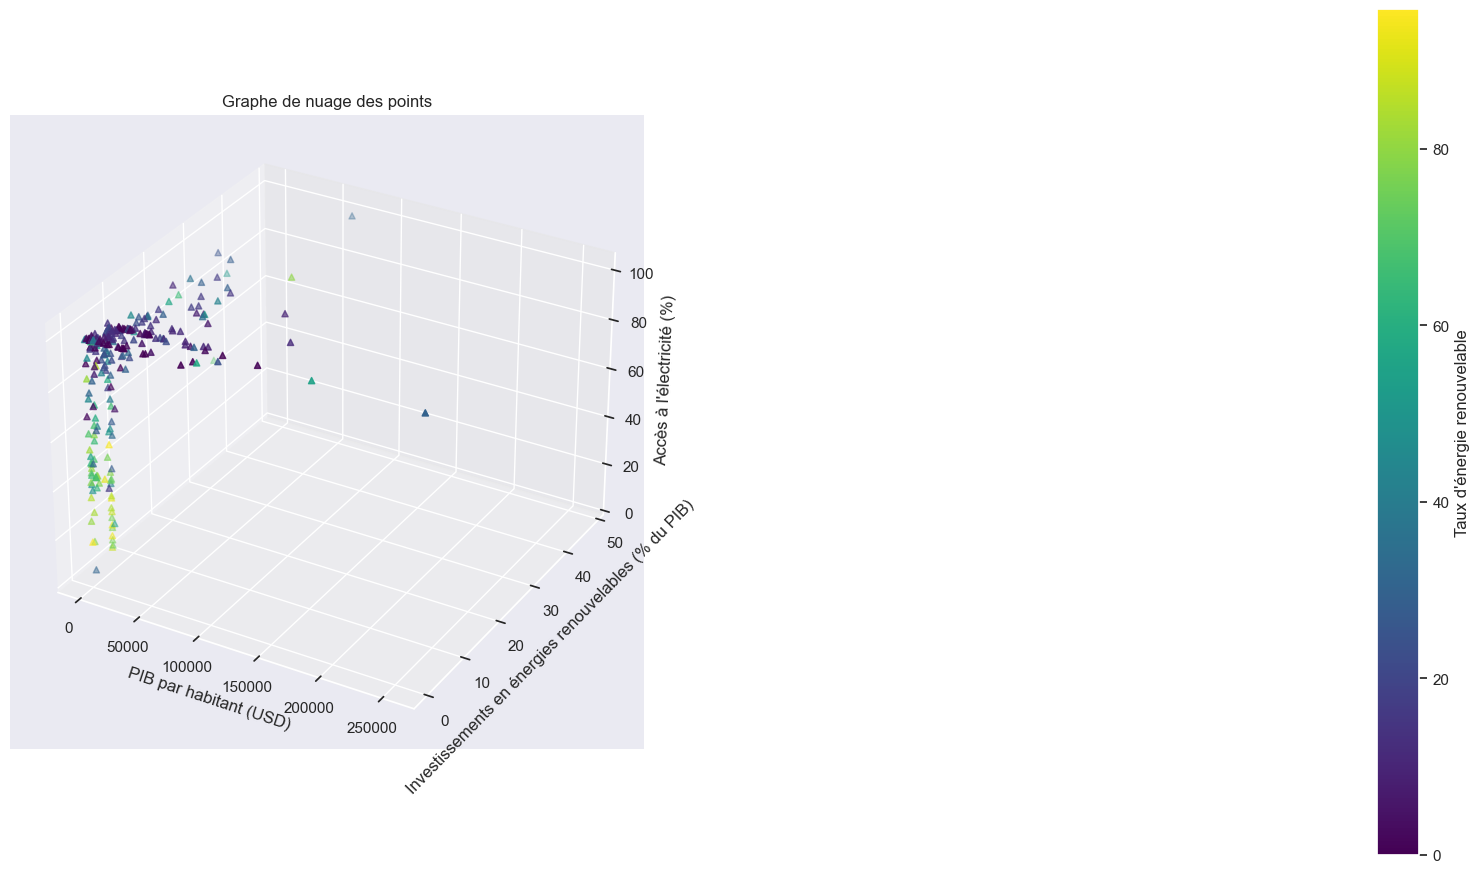

In [21]:
# 'x_vars' contient les 3 variables explicatives
# 'y_vars' contient la variable de réponse

# Créer un graphique de taille 16x10
grp = plt.figure(figsize=(40, 34))

# Ajouter un subplot 3D
ax = grp.add_subplot(121, projection='3d')

# Les variables explicatives
x = data_regression["PIB par habitant (USD)"]
y = data_regression["Investissements en énergies renouvelables (% du PIB)"]
z = data_regression["Accès à l'électricité (%)"]

# La variable de réponse (utilisée pour la couleur des points)
response = data_regression["Taux d'énergie renouvelable"]

# Créer le nuage de points en 3D
sc = ax.scatter(x, y, z, c=response, cmap='viridis', marker='^')

# Ajouter les labels aux axes
ax.set_xlabel('PIB par habitant (USD)')
ax.set_ylabel('Investissements en énergies renouvelables (% du PIB)')
ax.set_zlabel('Accès à l\'électricité (%)')

# Titre du graphique
plt.title('Graphe de nuage des points')

# Ajouter une barre de couleur pour indiquer les valeurs de la variable réponse
plt.colorbar(sc, label='Taux d\'énergie renouvelable', fraction=0.03, pad=0.52)

# Afficher le graphique
plt.show()

1. **Tendances générales** :
   - L’**accès à l’électricité** (axe Z) semble jouer un rôle majeur dans la variation du **taux d’énergie renouvelable**. Cela est cohérent avec la **corrélation négative forte (-0.76)** observée dans la matrice : les pays ayant un accès élevé à l’électricité tendent à utiliser des sources d’énergie moins renouvelables (probablement en raison d'une dépendance aux combustibles fossiles dans des systèmes électriques bien établis).

2. **Impact du PIB par habitant** :
   - Bien que le **PIB par habitant** varie fortement (axe X), sa relation avec le taux d’énergie renouvelable est **faiblement négative**. Les pays riches, bien qu’ayant des ressources pour développer les énergies renouvelables, semblent aussi être plus industrialisés et utiliser davantage de sources non renouvelables.

3. **Investissements en énergies renouvelables** :
   - Les **investissements (% du PIB)** (axe Y) montrent une dispersion importante, et la **corrélation faible** indique que leur impact direct sur le taux d’énergie renouvelable est limité dans ces données. Cela pourrait refléter que les investissements ne se traduisent pas toujours par des résultats immédiats dans le mix énergétique.


- **Accès à l'électricité** est le principal déterminant, souvent associé à une diminution du taux d'énergie renouvelable.
  
- Ce graphique illustre bien les disparités entre pays et la nécessité de prendre en compte plusieurs facteurs pour comprendre les moteurs de la transition énergétique.

## Étape 5 : Modélisation de la régression linéaire multiple

#### 1-Préparation des variables

In [4]:
#La variable cible est Taux d'énergie renouvelable, et les explicatives sont PIB par habitant (USD), Investissements en énergies renouvelables (% du PIB), et Accès à l'électricité (%).
# Définir X (variables explicatives) et y (variable cible)
X = data_regression[['PIB par habitant (USD)', 
                     'Investissements en énergies renouvelables (% du PIB)', 
                     'Accès à l\'électricité (%)']]
y = data_regression['Taux d\'énergie renouvelable']

#### 2-Ajustement du modèle

In [5]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des données explicatives avec conservation des noms des colonnes
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# Ajout de la constante pour le modèle (intercept)
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

# Création et ajustement du modèle sur les données d'entraînement
model = sm.OLS(y_train, X_train_scaled).fit()

# Résumé des résultats
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     Taux d'énergie renouvelable   R-squared:                       0.595
Model:                                     OLS   Adj. R-squared:                  0.589
Method:                          Least Squares   F-statistic:                     101.9
Date:                         Sat, 04 Jan 2025   Prob (F-statistic):           1.27e-40
Time:                                 11:58:57   Log-Likelihood:                -904.29
No. Observations:                          212   AIC:                             1817.
Df Residuals:                              208   BIC:                             1830.
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]

1. **R-squared** : 0.595
     - Cela signifie que **59,5 % de la variance** du taux d'énergie renouvelable est expliquée par les variables explicatives (PIB par habitant, investissements en énergies renouvelables, et accès à l'électricité).


2. **Coefficients des variables explicatives** :
   - **Constante (const)** : 30.8770
     - Il s'agit de l'ordonnée à l'origine du modèle de régression. Elle suggère que si toutes les variables prédictives étaient égales à zéro, le taux d'adoption des énergies renouvelables serait de 30,88 %.
   - **PIB par habitant** : -0.4482 
     - La valeur négative indique qu'un PIB par habitant plus élevé est associé à un taux des énergies renouvelables légèrement plus bas.
   - **Investissements en énergies renouvelables (% du PIB)** : 4.6608 
     - Chaque augmentation de **1 % des investissements en énergies renouvelables** est associée à une augmentation moyenne de **4,66 %** du taux d'énergie renouvelable.
   - **Accès à l'électricité (%)** : -21.0066 
     - Chaque augmentation de 1 % de l'accès à l'électricité est associée à une **diminution moyenne de 21,01 %** du taux d'énergie renouvelable. Cette relation est très significative.

## Étape 7 : Visualisation des résultats

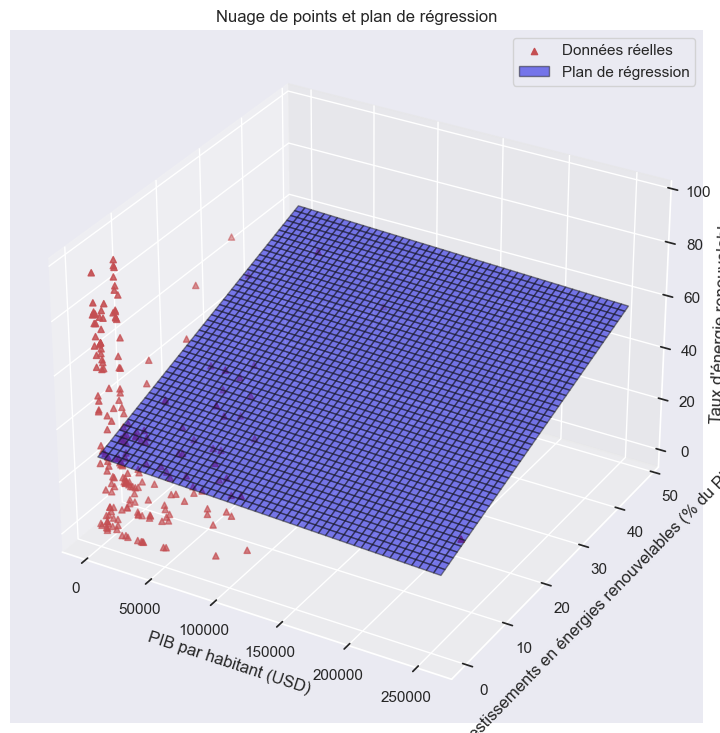

In [25]:
# Préparer les données pour la visualisation (fixer une variable explicative à sa moyenne)
fixed_value = X_train['Accès à l\'électricité (%)'].mean()  # Fixer la variable "Accès à l'électricité (%)"
x1 = np.linspace(X_train['PIB par habitant (USD)'].min(), X_train['PIB par habitant (USD)'].max(), 50)
x2 = np.linspace(X_train['Investissements en énergies renouvelables (% du PIB)'].min(), 
                 X_train['Investissements en énergies renouvelables (% du PIB)'].max(), 50)
x1, x2 = np.meshgrid(x1, x2)
x3_fixed = np.full_like(x1, fixed_value)

# Créer une grille pour les prédictions
X_grid = pd.DataFrame({
    'PIB par habitant (USD)': x1.ravel(),
    'Investissements en énergies renouvelables (% du PIB)': x2.ravel(),
    'Accès à l\'électricité (%)': x3_fixed.ravel()
})
X_grid_scaled = pd.DataFrame(scaler.transform(X_grid), columns=X_train.columns)  # Appliquer la standardisation
X_grid_scaled = sm.add_constant(X_grid_scaled)  # Ajouter l'intercept
y_pred_plane = model.predict(X_grid_scaled).values.reshape(x1.shape)

# Visualisation en 3D
fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(1, 1, 1, projection='3d')

# Nuage de points des données réelles
ax.scatter(X_train['PIB par habitant (USD)'], 
           X_train['Investissements en énergies renouvelables (% du PIB)'], 
           y_train, c='r', marker='^', label="Données réelles")

# Surface de régression
ax.plot_surface(x1, x2, y_pred_plane, alpha=0.5, color='blue', edgecolor='k', label="Plan de régression")

# Étiquettes des axes
ax.set_xlabel('PIB par habitant (USD)')
ax.set_ylabel('Investissements en énergies renouvelables (% du PIB)')
ax.set_zlabel('Taux d\'énergie renouvelable')
ax.set_title('Nuage de points et plan de régression')

plt.legend()
plt.show()

Le graphique montre une visualisation en 3D des données et du modèle de régression obtenu :

1. **Nuage de points (données réelles)** :
   - Les triangles rouges représentent les valeurs réelles des données. 
   - Ces points montrent comment les taux d'énergie renouvelable varient en fonction du PIB par habitant (axe X) et des investissements en énergies renouvelables en pourcentage du PIB (axe Y).

2. **Plan de régression (modèle prédictif)** :
   - Le plan bleu représente la prédiction du modèle de régression.
   - Il montre comment le taux d'énergie renouvelable (axe Z) est influencé par le PIB par habitant et les investissements en énergies renouvelables.

3. **Analyse visuelle** :
   - La majorité des données semblent concentrées dans une région où le PIB par habitant est faible et où les investissements en énergies renouvelables sont modérés.
   - Le plan de régression est relativement plat dans certaines zones, suggérant que l'effet des variables explicatives sur le taux d'énergie renouvelable pourrait être faible ou peu significatif dans ces régions.

## Étape 8 : Tests de régression

#### 1. Test de Durbin-Watson (pour détecter l'autocorrélation des résidus)

In [26]:
# Calcul des résidus du modèle
residuals = model.resid

# Test de Durbin-Watson pour l'autocorrélation des résidus
dw_statistic = durbin_watson(residuals)
print(f"Statistique de Durbin-Watson : {dw_statistic}")

# Interprétation :
# Une statistique proche de 2 indique l'absence d'autocorrélation.
# Une statistique inférieure à 2 suggère une autocorrélation positive.
# Une statistique supérieure à 2 suggère une autocorrélation négative.

Statistique de Durbin-Watson : 2.0510587437321077


Statistique de Durbin-Watson : 2.051 : Cette valeur est proche de 2, ce qui suggère qu'il n'y a pas d'autocorrélation significative des résidus. Les résidus semblent être indépendants.

#### 2. Test de White pour l'Hétéroscédasticité

In [27]:
# Test de White pour l'hétéroscédasticité
white_test_stat, white_p_value, _, _ = het_white(residuals, model.model.exog)

print(f"Statistique de White : {white_test_stat}")
print(f"P-value de White : {white_p_value}")

# Interprétation :
# Si le p-value est supérieur à 0.05, l'hypothèse nulle (absence d'hétéroscédasticité) n'est pas rejetée.
# Si le p-value est inférieur à 0.05, l'hypothèse nulle est rejetée et il y a de l'hétéroscédasticité.

Statistique de White : 13.357494787575003
P-value de White : 0.14708590305671204


- La p-value du test de White est de 0,147, ce qui est supérieur au seuil de 0,05. Par conséquent, nous ne rejetons pas l'hypothèse nulle. Cela indique qu'il n'y a pas d'hétéroscédasticité significative dans le modèle.
- L'absence d'hétéroscédasticité signifie que la variance des résidus est relativement constante à travers les différentes valeurs des variables explicatives. le modèle de régression semble être bien spécifié en termes d'homoscédasticité.

## Étape 8 : Évaluation de la Performance du Modèle de Régression Linéaire Multiple

#### 1. Erreur quadratique moyenne (MSE) et RMSE 

In [28]:
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test_scaled)

# Calcul du MSE
mse = metrics.mean_squared_error(y_test, y_pred)

# Calcul du RMSE
rmse = np.sqrt(mse)

print("MSE :", mse)
print("RMSE :", rmse)

MSE : 281.33942658826555
RMSE : 16.773175805084307


- **MSE (281.34)** : Cela représente la moyenne des carrés des erreurs entre les valeurs réelles (`y_test`) et les valeurs prédites (`y_pred`). Plus le MSE est bas, mieux c'est, car cela indique que les prédictions sont proches des valeurs réelles. Un MSE de 281.34 signifie qu'en moyenne, l'erreur de prédiction est de l'ordre de 281.34 pour le carré des différences. Cependant, comme il est en unités carrées, il est souvent difficile à interpréter directement sans la racine carrée.

- **RMSE (16.77)** : La racine carrée de la MSE donne le RMSE, qui est dans les mêmes unités que la variable cible . Le RMSE de 16.77 indique que, en moyenne, les prédictions s'écartent des valeurs réelles d'environ 16.77 unités. 

- Ces valeurs indiquent que, en moyenne, les prédictions du modèle sont à environ **16.77 unités** (selon les unités de la variable cible) des valeurs réelles.
- Un **MSE de 281.34** et un **RMSE de 16.77** suggèrent que bien que le modèle puisse expliquer une certaine variance des données, il existe encore un écart moyen notable entre les prédictions et les valeurs réelles.

#### 2. Coefficient de détermination (R²)

In [29]:
# Prédictions sur les données de test
y_pred = model.predict(X_test_scaled)

# Calcul du R²
r2 = r2_score(y_test, y_pred)

# Calcul du R² ajusté
n = len(y_test)  # Nombre d'observations
p = X_test_scaled.shape[1]  # Nombre de variables explicatives
r2_adjusted = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Coefficient de détermination (R²) :", r2)
print("Coefficient de détermination ajusté (R² ajusté) :", r2_adjusted)

Coefficient de détermination (R²) : 0.6169514373932443
Coefficient de détermination ajusté (R² ajusté) : 0.5856821669763663


-Nous avons obtenu un coefficient de détermination \( R^2 = 0.6169 \), ce qui signifie que notre modèle explique environ **61.7%** de la variance totale de \( y \)(`Taux d'énergie renouvelable`). Cela indique que nos variables explicatives (\( X \)) ont un impact significatif sur la prédiction de notre variable cible, ce qui est plutôt encourageant. Un \( R^2 \) supérieur à 0.6 est souvent considéré comme une performance raisonnable.

-En revanche, lorsque nous ajustons ce coefficient pour tenir compte du nombre de variables explicatives et de la taille de l'échantillon, nous obtenons un \( R^2 \) ajusté de **0.5857**. Ce score ajusté est légèrement inférieur au \( R^2 \) brut.

#### 3. P-values des coefficients

In [30]:
# Afficher les coefficients et les p-values
print("Coefficients des variables :")
print(model.params)

print("\nP-values des coefficients :")
print(model.pvalues)

Coefficients des variables :
const                                                   30.877036
PIB par habitant (USD)                                  -0.448172
Investissements en énergies renouvelables (% du PIB)     4.660835
Accès à l'électricité (%)                              -21.006575
dtype: float64

P-values des coefficients :
const                                                   7.141906e-67
PIB par habitant (USD)                                  7.376108e-01
Investissements en énergies renouvelables (% du PIB)    2.263681e-04
Accès à l'électricité (%)                               2.646031e-38
dtype: float64


Les **p-values** des coefficients permettent d'évaluer si chaque variable explicative a un impact statistiquement significatif sur la variable cible (**Taux d'énergie renouvelable**). Voici l'interprétation des résultats :  

##### Résultats :  
- **const (Intercept)** : p-value = **7.14e-67**  
  - Cette p-value extrêmement faible indique que l'intercept est significativement différent de zéro. Cela signifie qu'il y a une valeur de base significative pour le taux d'énergie renouvelable lorsque toutes les variables explicatives sont nulles.  

- **PIB par habitant (USD)** : p-value = **0.7376**  
  - Cette p-value est bien supérieure au seuil commun de 0.05. Cela indique que, pour ce modèle, le **PIB par habitant** n'a pas d'effet statistiquement significatif sur le taux d'énergie renouvelable.

- **Investissements en énergies renouvelables (% du PIB)** : p-value = **2.26e-04**  
  - Cette p-value est bien inférieure à 0.05, ce qui montre que cette variable a un impact significatif sur le taux d'énergie renouvelable. 

- **Accès à l'électricité (%)** : p-value = **2.65e-38**  
  - Cette p-value est extrêmement faible, indiquant un effet très significatif de l'accès à l'électricité sur le taux d'énergie renouvelable. Cette variable est donc très pertinente pour expliquer la variabilité de la cible.  

##### Conclusion :  
- Les **Investissements en énergies renouvelables** et **l'Accès à l'électricité** sont des variables explicatives significatives dans le modèle.  
- Le **PIB par habitant** n'est pas significatif ici, ce qui suggère qu'il contribue peu à la prédiction du taux d'énergie renouvelable.

#### 4. Erreurs résiduelles et Visualisation

##### 4.1- Diagramme des résidus :

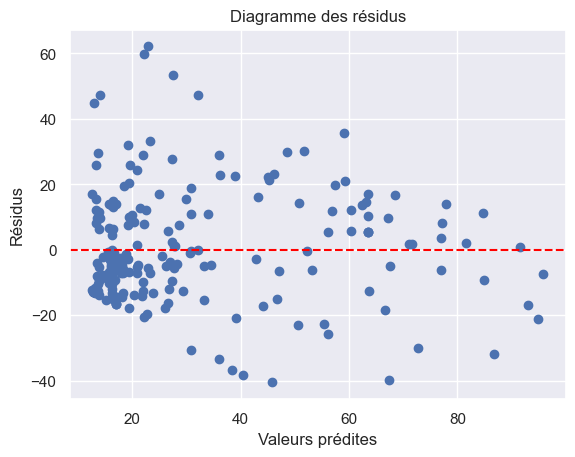

In [31]:
# Graphique des résidus
plt.scatter(model.fittedvalues, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.title("Diagramme des résidus")
plt.show()

1. **Axe horizontal (Valeurs prédites)** :
   - Représente les valeurs prédites par le modèle de régression.

2. **Axe vertical (Résidus)** :
   - Les résidus sont la différence entre les valeurs observées et les valeurs prédites par le modèle.

3. **Ligne horizontale rouge** :
   - Représente la ligne où les résidus sont nuls. 

---


  - Les résidus ne semblent pas être distribués de manière totalement aléatoire. 
  - On observe une plus grande concentration de résidus pour les petites valeurs prédites et une variabilité croissante pour les grandes valeurs.

  - La variabilité des résidus semble augmenter avec les valeurs prédites.

---



##### 4.2- Histogramme des résidus :

- un histogramme des résidus, superposé avec une courbe de distribution normale, afin d'évaluer la normalité des résidus :

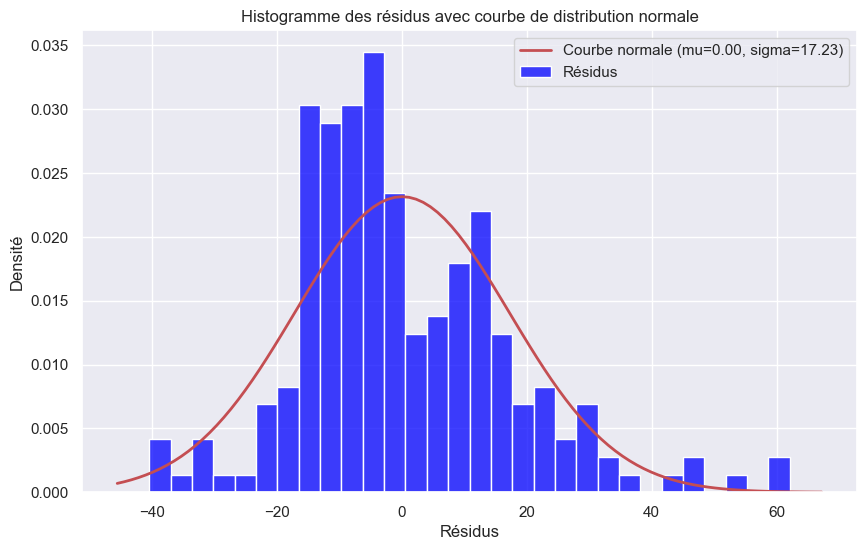

In [32]:
# Calcul des résidus
residuals = model.resid

# Tracer l'histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=False, bins=30, color="blue", label="Résidus", stat="density")

# Ajuster et tracer la courbe de distribution normale
mu, std = norm.fit(residuals)  # Moyenne et écart-type des résidus
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, "r", linewidth=2, label="Courbe normale (mu={:.2f}, sigma={:.2f})".format(mu, std))

# Ajouter des annotations
plt.title("Histogramme des résidus avec courbe de distribution normale")
plt.xlabel("Résidus")
plt.ylabel("Densité")
plt.legend()
plt.show()

##### Interprétation de l'histogramme des résidus avec courbe de distribution normale :

1. **Forme générale de l'histogramme** :
   - L'histogramme montre la distribution des résidus (différences entre les valeurs observées et les valeurs prédites).
   - Il semble approximativement symétrique, mais pas parfaitement ajusté à la courbe normale. Cela pourrait indiquer une légère déviation de la normalité.

2. **Courbe de distribution normale (ligne rouge)** :
   - La courbe rouge représente une distribution normale ajustée sur les résidus, avec une moyenne (`mu`) egal 0 et un écart-type (`sigma`) de 17.23.
   - Les résidus devraient idéalement suivre cette courbe si l'hypothèse de normalité est respectée.

3. **Points à remarquer** :
   - **Déviation sur les extrêmes** : Il y a quelques résidus extrêmes dans les queues gauche et droite, ce qui pourrait indiquer des valeurs atypiques ou une légère asymétrie.
   - **Concentration centrale** : La majorité des résidus se trouvent autour de 0, ce qui est cohérent avec un modèle bien ajusté.

4. **Conclusion** :
   - Les résidus montrent une distribution relativement proche d'une normale, mais il existe des signes de déviation, particulièrement dans les queues.
   - Pour valider davantage la normalité des résidus, il serait pertinent d'effectuer un **test statistique de normalité** (comme Shapiro-Wilk) en complément de l'histogramme.

##### 4.3- Test de normalité des résidus (Test de Shapiro-Wilk) :

In [33]:
# Test de normalité des résidus (Shapiro-Wilk)
from scipy import stats
stat, p_value = stats.shapiro(residuals)
print("\nTest de normalité des résidus (Shapiro-Wilk) : p-value =", p_value)


Test de normalité des résidus (Shapiro-Wilk) : p-value = 5.551436367948449e-06


1. **Rappel de l'hypothèse du test de Shapiro-Wilk** :
   - **Hypothèse nulle (H₀)** : Les résidus suivent une distribution normale.
   - **Hypothèse alternative (H₁)** : Les résidus ne suivent pas une distribution normale.

2. **Résultat obtenu** :
   - La **p-value** calculée est de `5.55e-06`(valeur très petite).

3. **Décision** :
   - Si la p-value est **inférieure à 0.05** (niveau de signification standard), on **rejette l'hypothèse nulle**.
   - Ici, la p-value est bien inférieure à 0.05, donc on rejette l'hypothèse selon laquelle les résidus suivent une distribution normale.

4. **Conclusion** :
   - Les résidus **ne suivent pas une distribution normale**.

Réponse à la question: Quels sont les déterminants économiques et sociaux qui influencent la proportion d'énergies renouvelables dans le mix énergétique des pays, et dans quelle mesure ces facteurs interagissent-ils pour façonner la transition énergétique ?
----

Les résultats de l'analyse de régression permettent d'identifier plusieurs déterminants économiques et sociaux qui influencent la proportion d'énergies renouvelables dans le mix énergétique des pays, ainsi que leur interaction. Voici les principales conclusions :  

#### 1. **Principaux déterminants identifiés** :  
- **Investissements en énergies renouvelables (% du PIB)** :  
  - Coefficient positif (4.6608, significatif à \(p < 0.001\)).  
  - Cela indique que des investissements plus élevés en énergies renouvelables, en proportion du PIB, sont associés à une augmentation significative de la proportion d'énergies renouvelables dans le mix énergétique.  
  - Cela souligne l'importance des efforts financiers et des politiques publiques visant à encourager ces investissements.  

- **Accès à l'électricité (%)** :  
  - Coefficient négatif (-21.0066, significatif à \(p < 0.001\)).  
  - Un accès plus élevé à l'électricité (souvent associé à une dépendance aux combustibles fossiles ou aux grandes infrastructures énergétiques centralisées) est associé à une proportion plus faible d'énergies renouvelables dans le mix énergétique.  
  - Cela peut refléter une tendance dans les pays développés où les réseaux électriques bien établis reposent encore largement sur des sources non renouvelables.  

- **PIB par habitant (USD)** :  
  - Coefficient non significatif (-0.4482, \(p = 0.738\)).  
  - Le PIB par habitant n'a pas d'influence significative sur la proportion d'énergies renouvelables, une fois les autres facteurs contrôlés. Cela peut indiquer que la transition énergétique ne dépend pas directement du niveau de richesse économique mais plutôt des politiques spécifiques.  

#### 2. **Interactions entre les facteurs** :  
- Les résultats montrent que les investissements en énergies renouvelables peuvent partiellement compenser les effets négatifs d'un accès élevé à l'électricité (qui tend à être corrélé avec des infrastructures fossiles).  
- Bien que le PIB par habitant ne soit pas significatif, il peut influencer indirectement ces deux autres variables, par exemple en facilitant des investissements ou en structurant le type d'accès à l'électricité.  
 
#### 3. **Implications pour la transition énergétique** :  
- Les investissements ciblés en énergies renouvelables sont cruciaux pour augmenter la part des énergies propres, indépendamment du niveau de richesse économique.  
- Dans les pays ayant un accès quasi universel à l'électricité, il peut être nécessaire de réformer les infrastructures énergétiques pour intégrer davantage d'énergies renouvelables.  
- La transition énergétique nécessite une combinaison d'incitations financières, de politiques publiques ambitieuses et de réformes des réseaux énergétiques existants.  

### En conclusion :  
Les déterminants clés identifiés sont les investissements en énergies renouvelables et l'accès à l'électricité, qui interagissent pour façonner la transition énergétique. Le rôle des politiques publiques et des priorités d'investissement est essentiel pour promouvoir une transition énergétique durable, en particulier dans les contextes où les infrastructures existantes freinent l'intégration des énergies renouvelables.

# E.Régression Logistique

## 📝 Questions posées :

## 1. Quels sont les facteurs déterminants pour qu’un pays dépasse un seuil critique (50 % d’énergie renouvelable dans son mix) ?

## 2. Un pays avec un accès à l’électricité élevé a-t-il plus de chances d’adopter des énergies renouvelables à grande échelle ?

## Étape 1 : Charger et préparer les données

In [1]:
import pandas as pd

# Charger le fichier CSV
df = pd.read_csv('transition_energetique_pays_2023.csv')

# Afficher les premières lignes du fichier
df.head()


,Pays,Taux d'énergie renouvelable,Année,Investissements en énergies renouvelables (% du PIB),PIB par habitant (USD),Taux de scolarisation secondaire (%),Accès à l'électricité (%),Revenu,Dépassement 50%,Classification Transition Énergétique
0,Afghanistan,17.846154,2023,4.838663,415.707417,47.154018,80.861538,Low income,Non,Débutante
1,Africa Eastern and Southern,62.614134,2023,1.346697,1659.515290,69.520690,38.090526,Lower middle income,Oui,Avancée
2,Africa Western and Central,77.223132,2023,0.335375,1568.724310,69.520690,49.108581,Lower middle income,Oui,Avancée
3,Albania,39.283333,2023,0.000000,8575.171134,86.322940,99.915385,Upper middle income,Non,Intermédiaire
4,Algeria,0.150000,2023,0.018654,5364.027950,69.520690,99.392308,Upper middle income,Non,Débutante


## Étape 2 : Prétraitement des données

In [2]:
# Assurez-vous que toutes les variables nécessaires sont présentes et traitées correctement
# Conversion de la variable cible en binaire : 1 si le pays dépasse 50% d'énergie renouvelable, 0 sinon
df['Dépassement 50%'] = (df["Taux d'énergie renouvelable"] > 50).astype(int)

# Sélectionner les variables explicatives et la variable cible
X = df[["Accès à l'électricité (%)", "PIB par habitant (USD)", "Taux de scolarisation secondaire (%)"]]
y = df["Dépassement 50%"]


## Étape 3 : Diviser les données en ensembles d'entraînement et de test

In [3]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensemble d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Étape 4 : Normaliser les données

In [4]:
from sklearn.preprocessing import StandardScaler

# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Étape 5 : Entraîner le modèle de régression logistique

In [5]:
from sklearn.linear_model import LogisticRegression

# Initialiser et entraîner le modèle
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

## Étape 6 : Faire des prédictions

In [6]:
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test_scaled)

# Probabilités prédites
y_prob = model.predict_proba(X_test_scaled)[:, 1]


## Étape 7 : Évaluer la performance du modèle

### 7.1 Matrice de confusion

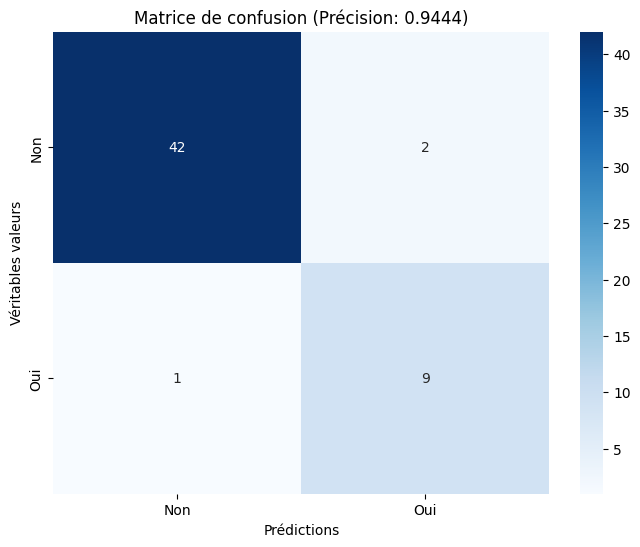

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcul de la précision
accuracy = accuracy_score(y_test, y_pred)

# Visualiser la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non', 'Oui'], yticklabels=['Non', 'Oui'])
plt.xlabel('Prédictions')
plt.ylabel('Véritables valeurs')
plt.title(f'Matrice de confusion (Précision: {accuracy:.4f})')
plt.show()


## 📊 Interprétation des résultats

### 1. Matrice de confusion
#### Détails des prédictions :
- **Valeurs réelles "Non" (n'ont pas dépassé 50 %) :**
  - **42** prédictions correctes (vrai négatif, TN).
  - **2** prédictions incorrectes (faux positif, FP).

- **Valeurs réelles "Oui" (ont dépassé 50 %) :**
  - **9** prédictions correctes (vrai positif, TP).
  - **1** prédiction incorrecte (faux négatif, FN).

- Cela signifie que **94.44 %** des prédictions du modèle sont correctes, ce qui montre une **excellente performance globale**.

#### Analyse détaillée :
- Le modèle est particulièrement performant pour prédire les cas où un pays **ne dépasse pas** 50 % d'énergie renouvelable (fort taux de vrais négatifs).


### 7.2 Courbe ROC et AUC

La courbe ROC (Receiver Operating Characteristic) et la AUC (Area Under the Curve) sont des outils importants pour évaluer la performance des modèles de classification binaire, notamment dans la régression logistique ou d'autres approches similaires. 

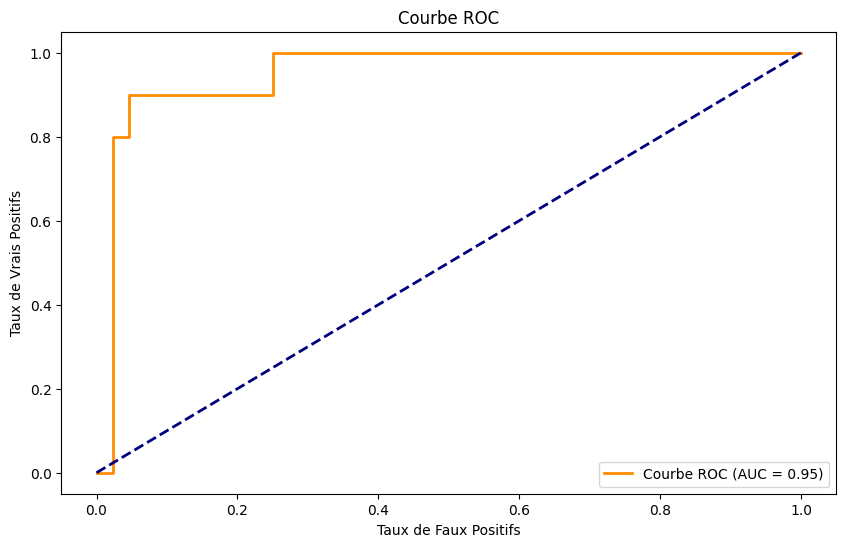

In [8]:
from sklearn.metrics import roc_curve, auc

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()


### . Courbe ROC et AUC
#### AUC (Area Under Curve) :

  AUC = 0.95

- Une AUC de **0.95** indique que le modèle possède une **très bonne capacité** à distinguer entre les pays qui dépassent ou non 50 % d'énergie renouvelable.
- Un AUC proche de 1 reflète une **excellente discrimination** entre les classes.

#### 📊 Interprétation de la courbe ROC :
- La courbe montre que le modèle atteint un **bon équilibre** entre :
  - Le **taux de vrais positifs (True Positive Rate, TPR)**.
  - Le **taux de faux positifs (False Positive Rate, FPR)**.
- Ici, le modèle **réduit efficacement les faux positifs tout en capturant la majorité des vrais positifs**, ce qui reflète une performance robuste.

---

### Conclusion générale :
Le modèle de régression logistique est **très performant** pour prédire si un pays dépasse ou non 50 % d'énergie renouvelable, comme le montrent :
- La précision globale de **94.44 %**.
- L'AUC de **0.95**, indiquant une capacité de discrimination élevée.
- La matrice de confusion, qui montre peu de faux négatifs et faux positifs.


### 7.3 Histogramme des probabilités prédites


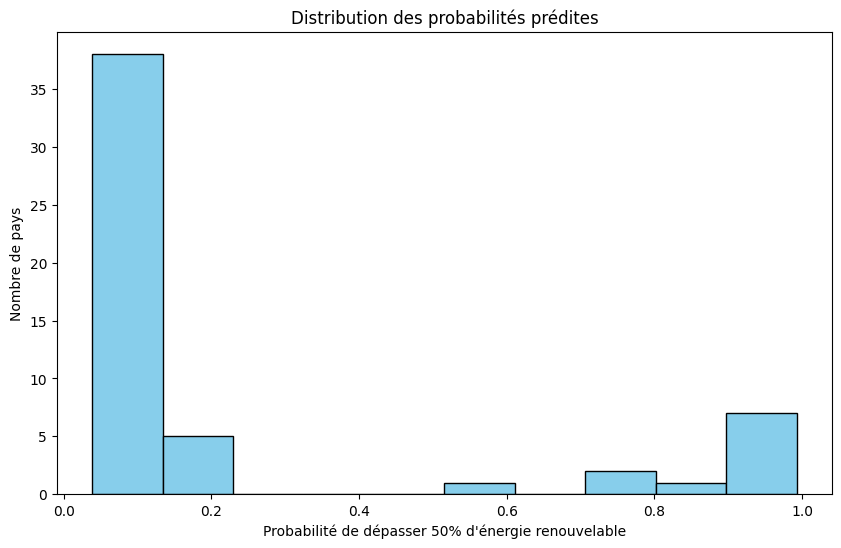

In [88]:
# Visualiser la distribution des probabilités prédites
plt.figure(figsize=(10, 6))
plt.hist(y_prob, bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution des probabilités prédites')
plt.xlabel('Probabilité de dépasser 50% d\'énergie renouvelable')
plt.ylabel('Nombre de pays')
plt.show()


### 📊 Interprétations :

#### 1. **Histogramme des probabilités prédites**
**Figure :** Distribution des probabilités prédites pour dépasser 50 % d'énergie renouvelable.  
**Interprétation :**  
La majorité des pays ont une faible probabilité de dépasser 50 % d'énergie renouvelable, comme indiqué par les barres concentrées près de 0. Cela montre que, selon le modèle, peu de pays ont des caractéristiques favorisant une forte intégration des énergies renouvelables dans leur mix énergétique.

### 7.4 Graphique des coefficients du modèle

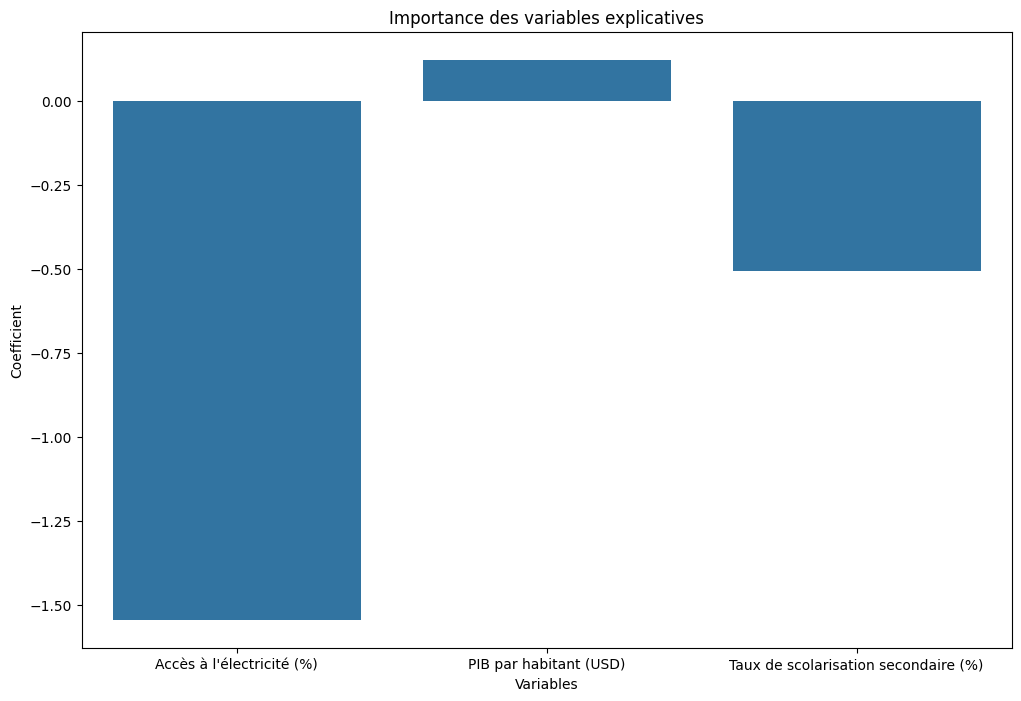

In [89]:
# Affichage des coefficients
coefficients = model.coef_[0]
features = X.columns

# Créer un DataFrame des coefficients
coeff_df = pd.DataFrame(coefficients, features, columns=['Coefficient'])

# Visualiser les coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x=coeff_df.index, y=coeff_df['Coefficient'])
plt.title("Importance des variables explicatives")
plt.xlabel("Variables")
plt.ylabel("Coefficient")
plt.show()


#### 2. **Barplot des coefficients des variables explicatives**
**Figure :** Importance des variables explicatives dans la régression logistique.  
### 📊Interprétation : 
- **Accès à l'électricité (%)** a un coefficient fortement négatif (-1.54), indiquant qu'un meilleur accès à l'électricité est associé à une probabilité plus faible de dépasser le seuil de 50 % d'énergie renouvelable. Cela pourrait être lié à une dépendance accrue à l'électricité issue de sources non renouvelables dans ces pays.
- **Taux de scolarisation secondaire (%)** a également un impact négatif (-0.51), suggérant que des niveaux élevés de scolarisation ne favorisent pas nécessairement l'adoption des énergies renouvelables. Cela pourrait refléter des priorités différentes en matière de développement ou de politique énergétique.
- **PIB par habitant (USD)** a un coefficient légèrement positif (+0.12), indiquant que les pays plus riches ont une légère tendance à dépasser le seuil de 50 % d'énergie renouvelable. Cependant, cet effet est faible et pourrait ne pas être significatif en pratique.


In [90]:
# Afficher les coefficients du modèle
coefficients = model.coef_[0]
features = X.columns

# Afficher les coefficients associés à chaque variable
for feature, coef in zip(features, coefficients):
    print(f'{feature}: {coef}')


Accès à l'électricité (%): -1.5435787117466035
PIB par habitant (USD): 0.12235023398679404
Taux de scolarisation secondaire (%): -0.5054327719358664


## 📝 Analyse des Résultats et réponse aux questions

## 1. Quels sont les facteurs déterminants pour qu’un pays dépasse un seuil critique (50 % d’énergie renouvelable dans son mix) ?

### Résumé des résultats :
- **Accès à l’électricité (%)** :
  - Le coefficient associé est **négatif et significatif** (-1.54). 
  - Cela signifie qu'un taux d'électrification élevé est lié à une probabilité plus faible d'atteindre un seuil de 50 % d’énergies renouvelables.
  - **Interprétation** : Les pays avec un accès universel ou très élevé à l’électricité ont souvent des infrastructures établies basées sur des énergies fossiles comme le charbon, le pétrole ou le gaz. Ces infrastructures, bien qu’efficaces pour assurer une électrification massive, freinent la transition vers les énergies renouvelables, car elles nécessitent des investissements conséquents pour leur remplacement. En revanche, dans les régions avec un accès limité à l'électricité, des solutions renouvelables comme les panneaux solaires ou les éoliennes sont souvent privilégiées dès le départ.

- **PIB par habitant (USD)** :
  - Le coefficient est faible et positif (0.12), ce qui montre que le PIB par habitant a une influence limitée sur la probabilité de dépasser 50 % d’énergie renouvelable.
  - **Interprétation** : La richesse économique d’un pays ne garantit pas une transition énergétique. Certains pays à faible PIB, mais riches en ressources naturelles renouvelables (soleil, vent, eau), peuvent dépasser ce seuil en investissant directement dans ces ressources. À l’inverse, les pays riches peuvent diversifier leurs mix énergétiques, intégrant les énergies renouvelables sans nécessairement dépasser les 50 %.

- **Taux de scolarisation secondaire (%)** :
  - Le coefficient est **négatif** (-0.50), indiquant que les pays avec un taux de scolarisation secondaire élevé ont une probabilité légèrement plus faible de dépasser le seuil critique.
  - **Interprétation** : Les pays ayant un haut niveau de scolarisation investissent souvent dans des infrastructures énergétiques diversifiées ou dans des technologies complexes, retardant potentiellement l’adoption exclusive des énergies renouvelables à grande échelle.

---

## 2. Un pays avec un accès à l’électricité élevé a-t-il plus de chances d’adopter des énergies renouvelables à grande échelle ?

### Résumé des résultats :
- **L’accès à l’électricité élevé réduit les chances de dépasser 50 % d’énergies renouvelables**, comme l’indique le coefficient négatif associé à cette variable.

### Interprétation :
- Les pays avec un accès élevé à l’électricité ont souvent des infrastructures énergétiques établies, reposant principalement sur des combustibles fossiles ou d’autres sources non renouvelables. Ces infrastructures nécessitent des investissements significatifs pour une transition vers des énergies renouvelables. 
- À l’inverse, les pays ayant un accès limité à l’électricité (souvent en développement) peuvent plus facilement intégrer des énergies renouvelables dans leurs infrastructures naissantes. Par exemple, les zones rurales isolées adoptent fréquemment des solutions comme les panneaux solaires ou les micro-réseaux éoliens pour répondre à leurs besoins énergétiques de base.

---

## Conclusion
Les résultats montrent que :
1. **Accès à l’électricité élevé** : Les infrastructures énergétiques basées sur des sources fossiles dans les pays bien électrifiés ralentissent leur transition énergétique. À l’inverse, un accès limité favorise l’adoption directe des énergies renouvelables.
2. **PIB par habitant** : La richesse économique n’est pas un facteur déterminant pour dépasser 50 % d’énergies renouvelables.
3. **Taux de scolarisation secondaire** : Bien qu’un taux de scolarisation élevé soit corrélé à des investissements technologiques avancés, cela peut diversifier le mix énergétique plutôt que de privilégier massivement les énergies renouvelables.

Ces résultats soulignent les défis et opportunités liés à la transition énergétique en fonction du contexte socio-économique et infrastructurel des pays.


# F.Analyse en Composantes Discriminantes AFD

# 📝 Questions posées:

## 1. **Peut-on classer les pays selon leur niveau d’avancement dans la transition énergétique (avancée, intermédiaire, débutante) à partir des données économiques et sociales ?**  

## 2. **Quels indicateurs permettent de discriminer efficacement entre les pays avancés et les pays en retard dans leur transition énergétique ?**  

## Étape 1 : Charger et préparer les données

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [15]:
# Charger les données depuis le fichier CSV
file_path = "transition_energetique_pays_2023.xlsx"  # Chemin vers votre fichier
df = pd.read_excel(file_path)

In [16]:

features = [
    'Taux d\'énergie renouvelable', 
    'PIB par habitant (USD)', 
    'Taux de scolarisation secondaire (%)',
    'Accès à l\'électricité (%)'
]
target = 'Classification Transition Énergétique'

In [17]:
# Préparation des données
X = df[features]
y = df[target]

## Étape 2 :  Encodage des classes cibles

In [18]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Convertit 'Avancée', 'Intermédiaire', 'Débutante' en 0, 1, 2 respectivement

# Standardisation des données pour les mettre sur une même échelle (centrage et réduction)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Étape 3 :  Division des données

In [19]:
# Division des données en ensemble d'entraînement et de test (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [20]:
# Créer un DataFrame avec les caractéristiques et la classe cible
df_train = pd.DataFrame(X_train, columns=features)
df_train['class'] = le.inverse_transform(y_train)

In [21]:
# Filtrer uniquement les colonnes numériques
numerical_columns = df_train.select_dtypes(include=[np.number]).columns

## Étape 4 :  Calcul des moyennes

In [22]:
# Calcul des moyennes des indicateurs pour chaque classe (Avancée, Intermédiaire, Débutante)
class_feature_means = pd.DataFrame(columns=le.classes_)
for c, rows in df_train.groupby('class'):
    # Sélectionner uniquement les colonnes numériques pour le calcul de la moyenne
    class_feature_means[c] = rows[numerical_columns].mean()
    
print(class_feature_means)

                                       Avancée  Débutante  Intermédiaire
Taux d'énergie renouvelable           1.554885  -0.740046       0.171936
PIB par habitant (USD)               -0.459706   0.126937       0.004142
Taux de scolarisation secondaire (%) -0.970429   0.458720       0.035041
Accès à l'électricité (%)            -1.194072   0.513150       0.111352


# 📊 Moyennes des Indicateurs par Classe 

## 🔹 Interprétation des Résultats  

### 1. **Taux d’énergie renouvelable**  
- **Les pays avancés** ont un taux d’énergie renouvelable **significativement plus élevé (1.55)** que les pays intermédiaires (0.17) et débutants (-0.74).  
- **Indicateur clé de discrimination** : il est fort pour les pays avancés mais faible, voire négatif, pour les pays débutants.  

---

### 2. **PIB par habitant (USD)**  
- Contrairement aux attentes, le **PIB est négatif (-0.45)** pour les pays avancés.  
- **Les pays intermédiaires** affichent un **PIB plus élevé (0.80)**, suivi par les pays débutants (0.12).  
- Cette observation pourrait refléter que certains pays avancés en transition énergétique sont à revenu modéré mais ont des politiques énergétiques ambitieuses.  

---

### 3. **Taux de scolarisation secondaire (%)**  
- **Les pays débutants** montrent une **scolarisation plus élevée (0.45)** que les pays avancés (-0.97).  
- Cela suggère que les pays avancés ont déjà dépassé cette phase de croissance éducative tandis que les pays débutants sont encore en pleine expansion dans ce domaine.  

---

### 4. **Accès à l’électricité (%)**  
- **Les pays débutants** affichent une valeur positive (0.51), tandis que les pays avancés ont un accès à l’électricité négatif (-1.19).  
- Cette observation pourrait traduire que les pays avancés se concentrent davantage sur des **améliorations qualitatives (énergies renouvelables)** plutôt que sur l'extension du réseau électrique.  

---

## 🏆 Points Clés :  
- **Taux d’énergie renouvelable** est **l’indicateur principal** pour distinguer les pays avancés.  
- **L’accès à l’électricité et la scolarisation secondaire** sont des facteurs discriminants pour les **pays débutants**.  
- **Le PIB par habitant** reste un indicateur complexe, mais il distingue particulièrement les pays intermédiaires.  

**Conclusion :**  
Les **indicateurs sociaux et économiques** jouent un rôle important dans la différenciation des pays selon leur niveau d’avancement dans la transition énergétique.  

## Étape 5 :  La matrice de dispersion intra-classe

In [23]:
# Calcul de la matrice de dispersion intra-classe (within-class scatter matrix)
within_class_scatter_matrix = np.zeros((X_train.shape[1], X_train.shape[1]))
for c, rows in df_train.groupby('class'):
    rows = rows.drop(['class'], axis=1)
    s = np.zeros((X_train.shape[1], X_train.shape[1]))
    # Calculer la matrice de dispersion intra-classe
    for index, row in rows.iterrows():
        x, mc = row.values.reshape(X_train.shape[1],1), class_feature_means[c].values.reshape(X_train.shape[1],1)
        s += (x - mc).dot((x - mc).T)
    
    within_class_scatter_matrix += s

## Étape 6 :  La matrice de dispersion inter-classe 

In [24]:
# Calcul de la matrice de dispersion inter-classe (between-class scatter matrix)
feature_means = df_train.drop('class', axis=1).mean()
between_class_scatter_matrix = np.zeros((X_train.shape[1], X_train.shape[1]))
for c in class_feature_means:
    n = len(df_train.loc[df_train['class'] == c].index)  # Nombre de pays dans chaque classe
    
    mc, m = class_feature_means[c].values.reshape(X_train.shape[1],1), feature_means.values.reshape(X_train.shape[1],1)
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)

In [25]:
# Calcul des valeurs propres et vecteurs propres (AFD) pour discriminer les classes
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

In [26]:
# Affichage des matrices de dispersion
print("Matrice de dispersion intra-classe :")
print(within_class_scatter_matrix)

print("\nMatrice de dispersion inter-classe :")
print(between_class_scatter_matrix)


Matrice de dispersion intra-classe :
[[ 20.8740064   -7.55892156  -6.29162704 -14.77177138]
 [ -7.55892156 169.99048487  51.30004139  40.15187901]
 [ -6.29162704  51.30004139 128.86777316  66.81470339]
 [-14.77177138  40.15187901  66.81470339  93.52958538]]

Matrice de dispersion inter-classe :
[[ 189.40911792  -47.72869186 -117.05204155 -139.1755065 ]
 [ -47.72869186   12.48312752   30.09195112   36.21405303]
 [-117.05204155   30.09195112   73.11608678   87.50357891]
 [-139.1755065    36.21405303   87.50357891  105.13180629]]


# 🧮 Matrices de Dispersion : Interprétation  

## 1. Matrice de Dispersion Intra-classe (Within-Class Scatter Matrix)  


### 🔹 Analyse :  
- Les valeurs élevées **sur la diagonale** (ex : `169.90`, `128.86`, `93.52`) indiquent une dispersion relativement importante au sein des classes.  
- Les éléments hors-diagonale (ex : `-7.55`, `40.15`) montrent des corrélations entre les différentes variables pour une même classe.  
- La **plus grande variabilité** est observée pour la deuxième variable (probablement **PIB par habitant**). Cela suggère que cette variable fluctue davantage au sein des classes.  

---

## 2. Matrice de Dispersion Inter-classe (Between-Class Scatter Matrix)  

### 🔹 Analyse :  
- Les valeurs sur la diagonale sont nettement **plus élevées** que dans la matrice intra-classe, en particulier pour la première variable (`189.41`).  
- Cela indique que **les moyennes des classes diffèrent fortement**, ce qui souligne une bonne séparation entre les classes.  
- Les éléments hors-diagonale négatifs (ex : `-117.05`, `-139.17`) montrent une forte corrélation négative entre certaines variables pour les différentes classes, ce qui pourrait refléter des compromis entre différents indicateurs (par exemple, des pays à faible PIB ayant de faibles taux de scolarisation).  

---

##  Interprétation Générale :  
- **Bonne discrimination** : La matrice de dispersion inter-classe est globalement **plus grande** que la matrice intra-classe, indiquant que les pays de différentes classes sont bien séparés.  
- **Variables dominantes** :  
  - Le **PIB par habitant** semble jouer un rôle majeur dans la différenciation entre les classes.  
  - L'**énergie renouvelable** et l'**accès à l’électricité** contribuent également, mais dans une moindre mesure.  

En conclusion, la forte séparation des classes justifie l'efficacité de l'Analyse Factorielle Discriminante (AFD) dans ce contexte.  



## Étape 7 :  La projection des pays selon les axes discriminants

In [27]:
# Tri des valeurs propres pour sélectionner les axes les plus discriminants
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)

In [28]:
# Projection des données sur les 2 premiers vecteurs propres (axes discriminants)
w_matrix = np.hstack((pairs[0][1].reshape(X_train.shape[1],1), pairs[1][1].reshape(X_train.shape[1],1))).real
X_lda = np.array(X_train.dot(w_matrix)) # Projection des données

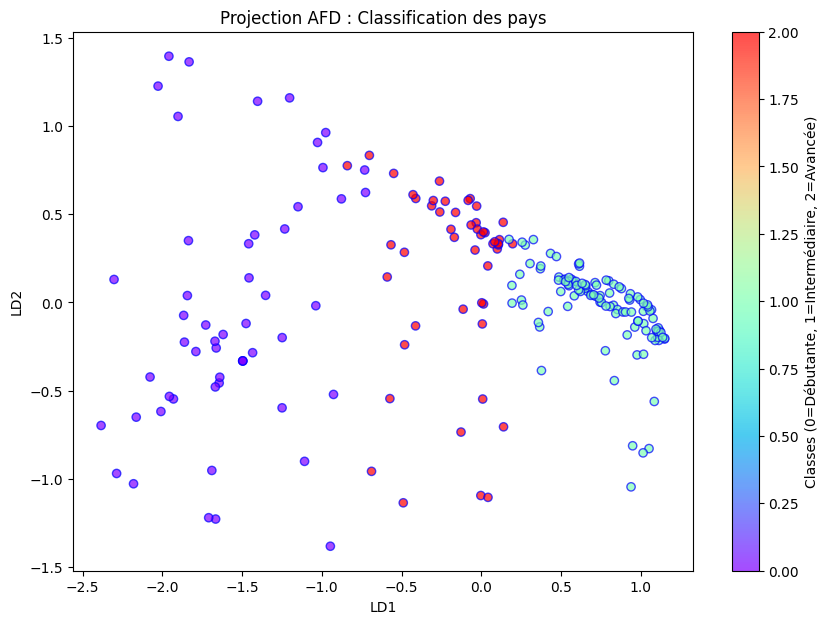

In [29]:
# Visualisation de la projection des pays selon les axes discriminants (LD1 et LD2)
plt.figure(figsize=(10, 7))
plt.xlabel('LD1')  # Premier axe discriminant
plt.ylabel('LD2')  # Deuxième axe discriminant
plt.title("Projection AFD : Classification des pays")
plt.scatter(
    X_lda[:, 0], X_lda[:, 1], 
    c=y_train, cmap='rainbow', 
    alpha=0.7, edgecolors='b'
)
plt.colorbar(label="Classes (0=Débutante, 1=Intermédiaire, 2=Avancée)")
plt.show()

# 📊 Interprétation du Graphique : Projection AFD – Classification des Pays  
### 1. Classification des pays selon leur niveau d’avancement dans la transition énergétique  

#### 🔹 Interprétation du Graphique de Projection AFD  
- Le graphique montre la projection des pays selon deux axes discriminants (LD1 et LD2).  
- Les points colorés indiquent les classes de pays :  
  - **Bleu** : Pays débutants (0)  
  - **Violet** : Pays intermédiaires (1)  
  - **Rouge** : Pays avancés (2)  
- On observe une bonne séparation des classes, ce qui indique que l’AFD permet de distinguer efficacement les groupes.  

#### 🔹 Séparation des Classes  
- **LD1** semble être le principal facteur de discrimination. Il sépare les pays avancés des pays intermédiaires et débutants.  
- **LD2** apporte une séparation secondaire, probablement pour distinguer les pays intermédiaires des débutants.
-  **Superposition partielle** :  
  - On observe **un certain chevauchement** entre les pays débutants et intermédiaires, indiquant que certains pays en transition intermédiaire partagent des caractéristiques avec ceux en début de transition.  
  - En revanche, **les pays avancés sont nettement séparés** du reste, montrant qu’ils forment un groupe distinct.  

### 2. Importance des Indicateurs  

#### 🔹 Variance Expliquée 

In [30]:
# Affichage de la variance expliquée par chaque vecteur propre
eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print(f'Eigenvector {i}: {(pair[0]/eigen_value_sums).real:.2%}') # Contribution de chaque vecteur propre

Explained Variance
Eigenvector 0: 99.61%
Eigenvector 1: 0.39%
Eigenvector 2: 0.00%
Eigenvector 3: 0.00%


- **Le premier vecteur propre (LD1) capture pratiquement toute la variance (99,61%)**.  
- Cela signifie que **LD1 seul suffit pour discriminer efficacement les pays**.  

---

### 🔹 Moyennes par Classe  

**Interprétation :**  
- Les pays avancés présentent des moyennes plus élevées pour tous les indicateurs.  
- Le **PIB par habitant** est le facteur le plus discriminant, suivi du **taux d’énergie renouvelable**.  
- L’**accès à l’électricité** et le **taux de scolarisation secondaire** jouent également un rôle dans la distinction entre les classes.  

# 📝 Réponses aux Questions  

## 1. **Peut-on classer les pays selon leur niveau d’avancement dans la transition énergétique (avancée, intermédiaire, débutante) à partir des données économiques et sociales ?**  

**Oui**, il est possible de classer les pays selon leur niveau d’avancement dans la transition énergétique en utilisant les indicateurs économiques et sociaux.  

### 🔹 Justification :  
- L'**Analyse Factorielle Discriminante (AFD)** montre une **séparation claire des classes** (débutante, intermédiaire, avancée) principalement le long de la première composante (LD1).  
- **99,61% de la variance** est expliquée par **LD1**, ce qui indique que **les variables sélectionnées** (taux d’énergie renouvelable, PIB par habitant, taux de scolarisation secondaire, accès à l’électricité) sont **efficaces pour discriminer les pays** selon leur niveau de transition énergétique.  
- **Les pays avancés sont bien séparés** des pays intermédiaires et débutants, ce qui prouve que les **indicateurs économiques et sociaux reflètent les dynamiques de transition énergétique**.  

---

## 2. **Quels indicateurs permettent de discriminer efficacement entre les pays avancés et les pays en retard dans leur transition énergétique ?**  

### 🔹 Principaux Indicateurs de Discrimination :  
1. **Taux d’énergie renouvelable**  
   - C’est **l’indicateur clé** qui distingue fortement les pays avancés des autres.  
   - Les pays avancés affichent une valeur élevée (1.55), tandis que les pays débutants sont négatifs (-0.74).  

2. **Accès à l’électricité (%)**  
   - Les pays débutants montrent des valeurs positives (0.51), ce qui reflète une **extension du réseau électrique**.  
   - Les pays avancés ont une valeur négative (-1.19), ce qui suggère qu’ils se concentrent davantage sur des améliorations **qualitatives et renouvelables**.  

3. **Taux de scolarisation secondaire (%)**  
   - Cet indicateur est **plus élevé chez les pays débutants (0.45)** que chez les pays avancés (-0.97).   
   - Cela reflète une **croissance éducative en cours** dans les pays débutants et une transition plus avancée pour les pays déjà développés.  

4. **PIB par habitant (USD)**  
   - Bien que le PIB soit **plus élevé pour les pays intermédiaires (0.80)**, il est **négatif pour les pays avancés (-0.45)**.  
   - Ce paradoxe suggère que certains **pays avancés ont des politiques énergétiques fortes malgré un PIB modéré**.  

---

##  Conclusion :  
- **L’énergie renouvelable et l’accès à l’électricité** sont les indicateurs **les plus discriminants** pour évaluer la transition énergétique.  
- **Les indicateurs sociaux (scolarisation)** jouent un rôle plus important pour différencier **les pays débutants et intermédiaires**.  
- Les données économiques et sociales permettent ainsi une **classification robuste** des pays, démontrant que les politiques de transition énergétique sont étroitement liées à ces facteurs.  
